In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set option to display max columns i.e (Display all the columns of the dataframe).
pd.pandas.set_option('display.max_columns',None)

In [2]:
data_train=pd.read_csv('House Pricing Dataset/train.csv')
data_test=pd.read_csv('House Pricing Dataset/test.csv')
dataset = [data_train,data_test]
df = pd.concat(dataset).reset_index(drop=True)
df.head()
df.shape

(2919, 81)

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [5]:
# Let's first deal with categorical nan values.
categorical_feature_nan = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtype == 'O']
for i in categorical_feature_nan:
    print(i, df[i].isnull().sum())

MSZoning 4
Alley 2721
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 1766
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
Electrical 1
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2348
MiscFeature 2814
SaleType 1


In [6]:
# Let's first deal with categorical nan values.
categorical_feature_nan = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtype == 'O']
for i in categorical_feature_nan:
    print(i, df[i].isnull().sum())

MSZoning 4
Alley 2721
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 1766
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
Electrical 1
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2348
MiscFeature 2814
SaleType 1


In [7]:
# NA have some meanings according to data description.
df[categorical_feature_nan] = df[categorical_feature_nan].fillna('NA')
df.head()
df[categorical_feature_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [8]:
# Now, deal with numerical missing values
numerical_feature_nan = [i for i in df.columns if df[i].isnull().sum()>0 
                         and df[i].dtype != 'O'
                         and i not in ['SalePrice'] ]
for i in numerical_feature_nan:
    print(i, df[i].isnull().sum())

LotFrontage 486
MasVnrArea 23
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1


In [9]:
# Now, fill missing values with median coz data has many outliers so filling with mean or mode is not best for dataset.
for i in numerical_feature_nan:
    mod_value = df[i].mode()[0]
    df[i].fillna(mod_value, inplace=True)
df[numerical_feature_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [10]:
from pandas.api.types import CategoricalDtype
df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'No', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes
df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes
df['Street'] = df['Street'].astype(CategoricalDtype(categories=['Grvl', 'Pave'], ordered = True)).cat.codes
df['Alley'] = df['Alley'].astype(CategoricalDtype(categories=['NA','Grvl', 'Pave'], ordered = True)).cat.codes
df['LotShape'] = df['LotShape'].astype(CategoricalDtype(categories=['IR3', 'IR2', 'IR1', 'Reg'], ordered = True)).cat.codes
df['LandContour'] = df['LandContour'].astype(CategoricalDtype(categories=['Low', 'HLS', 'Bnk', 'Lvl'], ordered = True)).cat.codes
df['LandSlope'] = df['LandSlope'].astype(CategoricalDtype(categories=['Sev', 'Mod', 'Gtl'], ordered = True)).cat.codes
df['Electrical'] = df['Electrical'].astype(CategoricalDtype(categories=['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], ordered = True)).cat.codes
df['FireplaceQu'] = df['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageType'] = df['GarageType'].astype(CategoricalDtype(categories=['NA', 'Detchd', 'CarPort', 'BuiltIn', 'Basment', 'Attchd', '2Types'], ordered = True)).cat.codes
df['PoolQC'] = df['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Fence'] = df['Fence'].astype(CategoricalDtype(categories=['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], ordered = True)).cat.codes


In [11]:
numeric = [i for i in df.columns if df[i].dtype != 'O']
numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

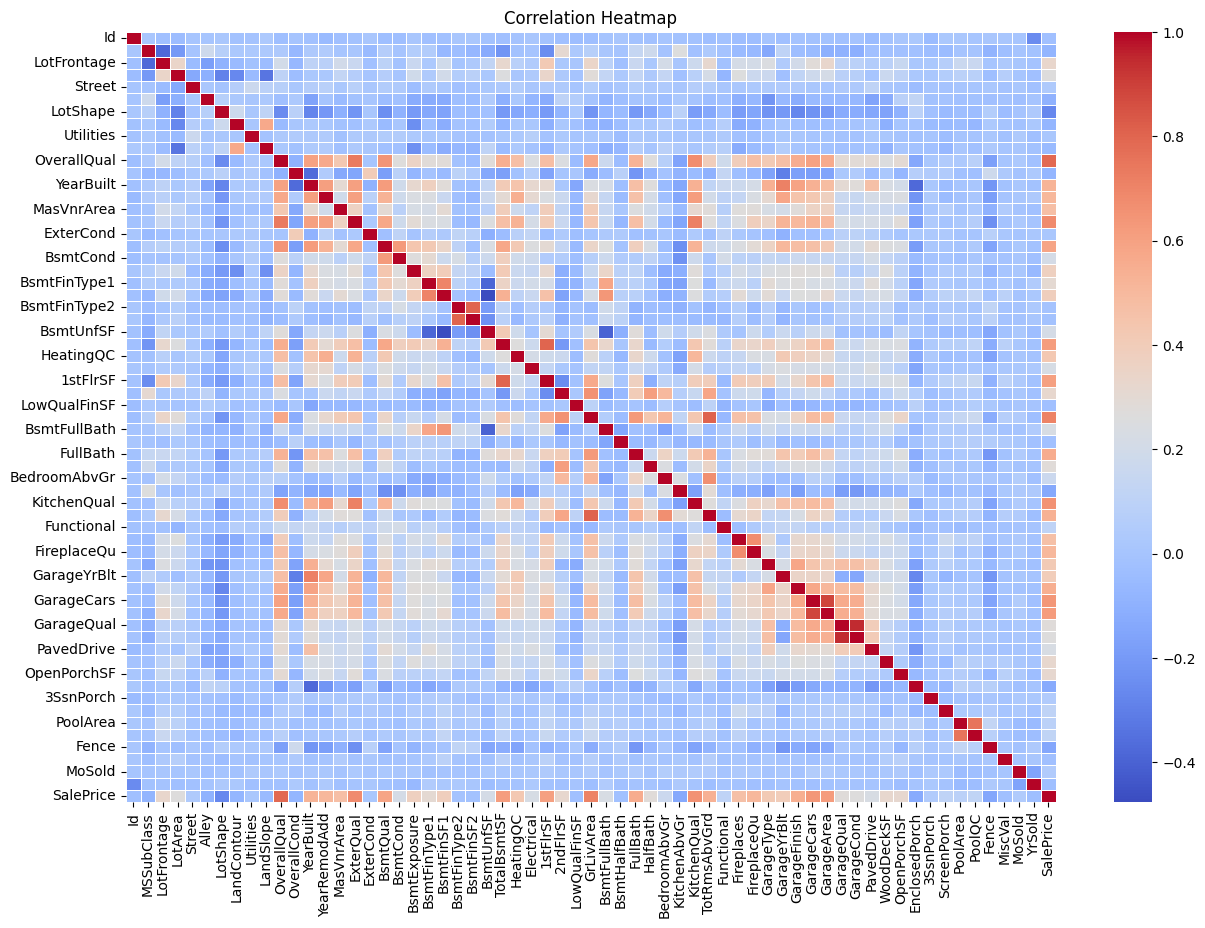

In [12]:
corr_matrix = df.select_dtypes(include=['int8', 'int64', 'float64']).corr()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
correlation = corr_matrix.corr()
print(correlation['SalePrice'].sort_values(ascending=False), '\n')

SalePrice        1.000000
OverallQual      0.967330
ExterQual        0.923439
KitchenQual      0.923329
GarageCars       0.904557
                   ...   
Alley           -0.359623
EnclosedPorch   -0.506698
OverallCond     -0.518805
Fence           -0.584118
LotShape        -0.734822
Name: SalePrice, Length: 63, dtype: float64 



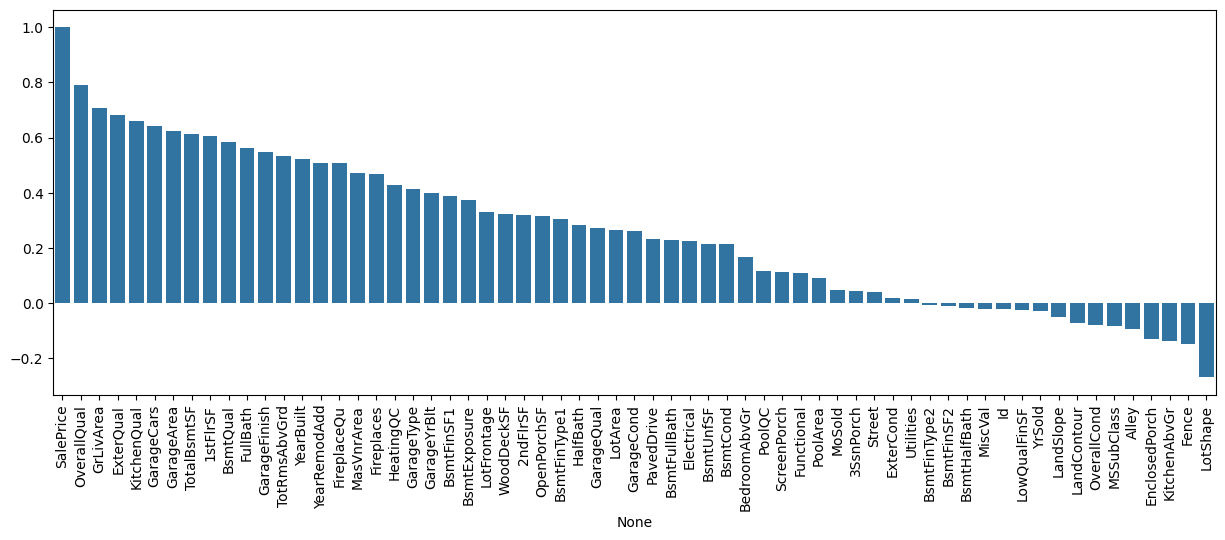

In [14]:
corr_SalePrice = corr_matrix['SalePrice'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))# Create a seaborn bar chart
sns.barplot(x=corr_SalePrice.index, y=corr_SalePrice.values)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)
plt.show()

In [15]:
top_40_features = corr_SalePrice.head(40).index 

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


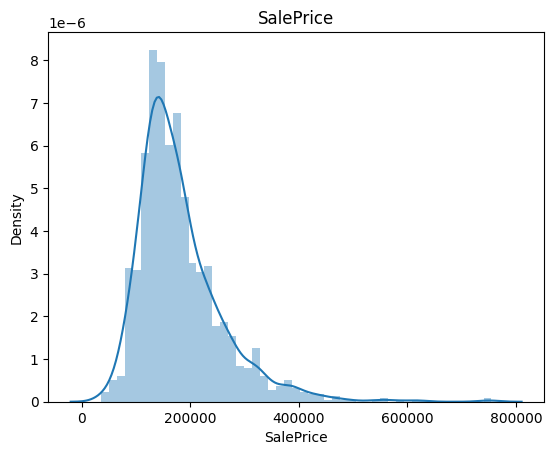

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


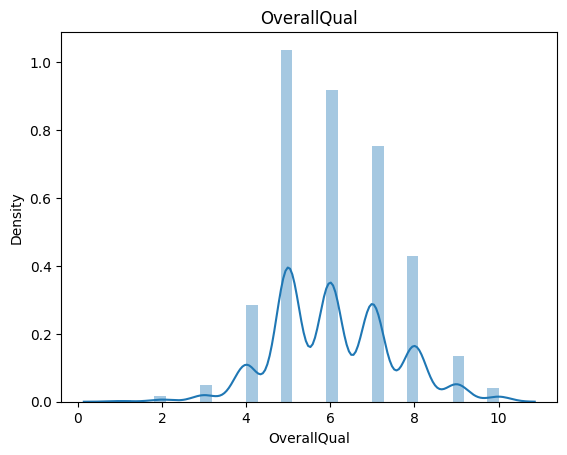

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


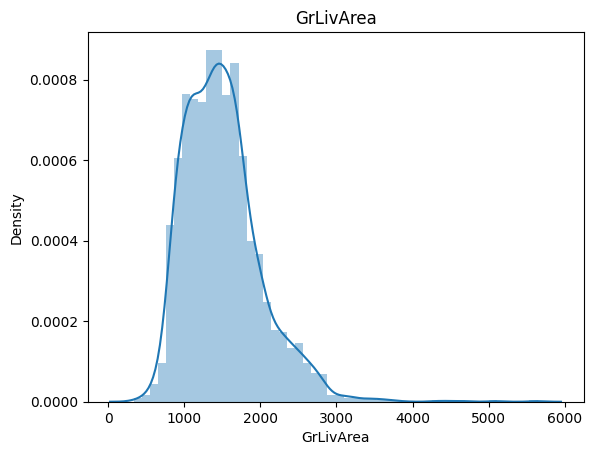

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


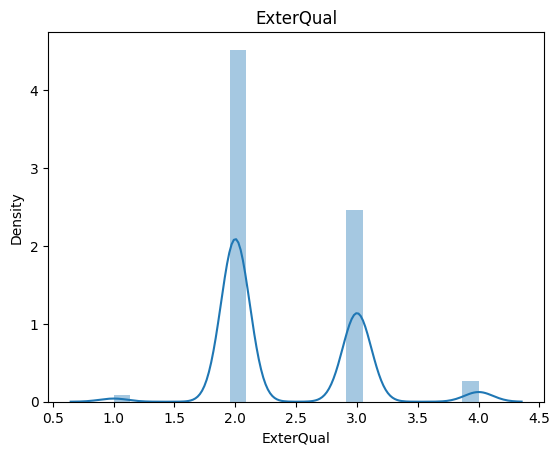

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


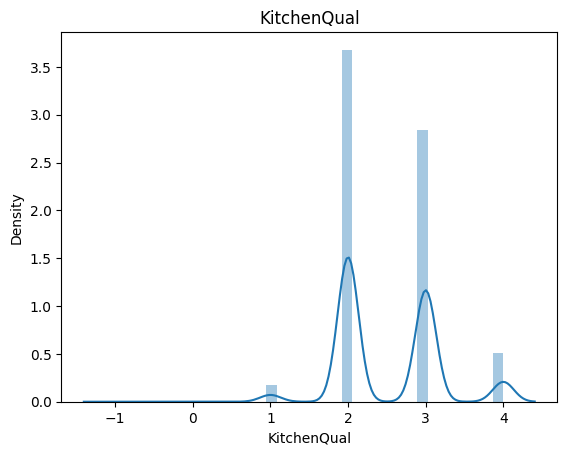

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


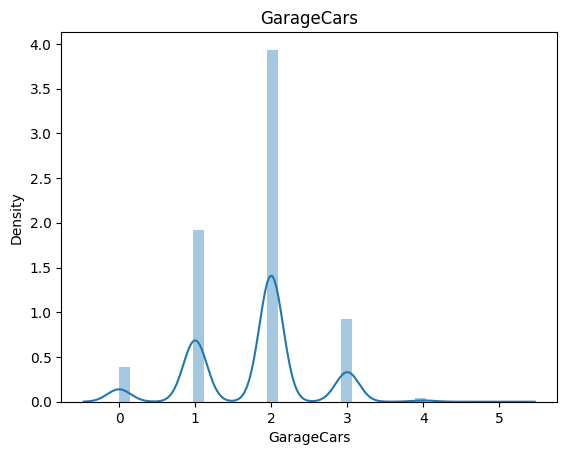

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


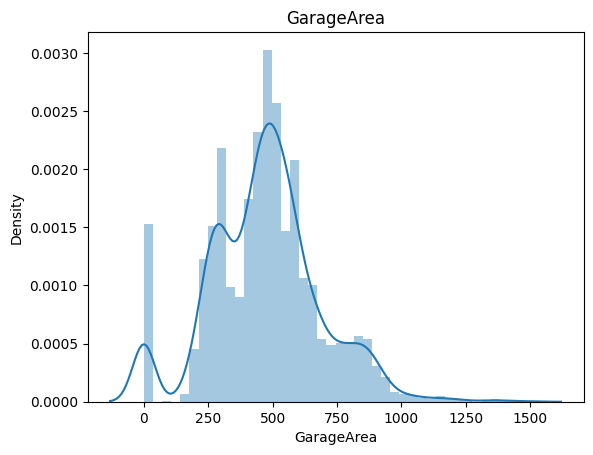

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


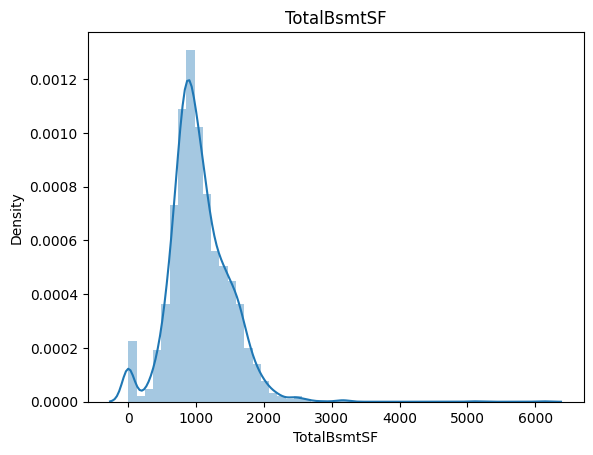

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


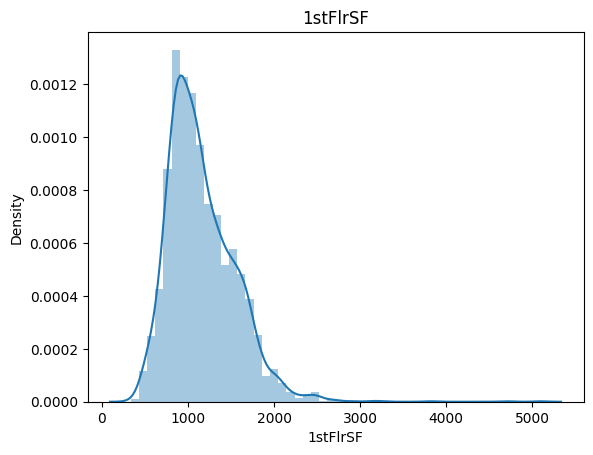

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


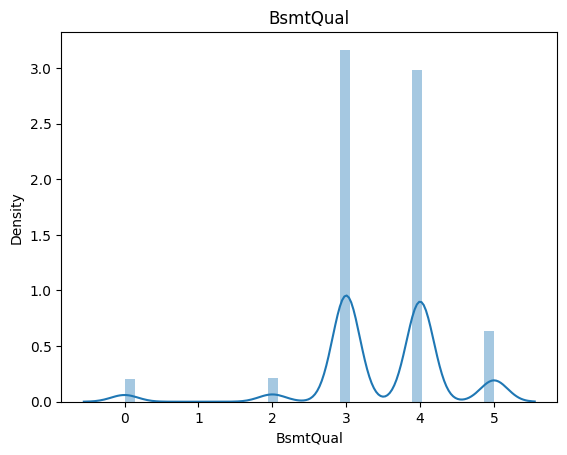

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


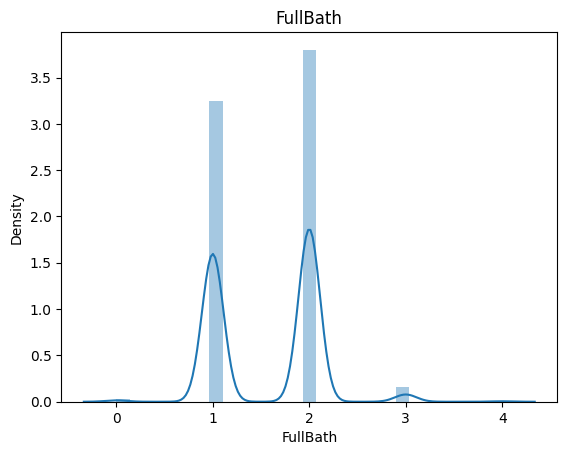

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


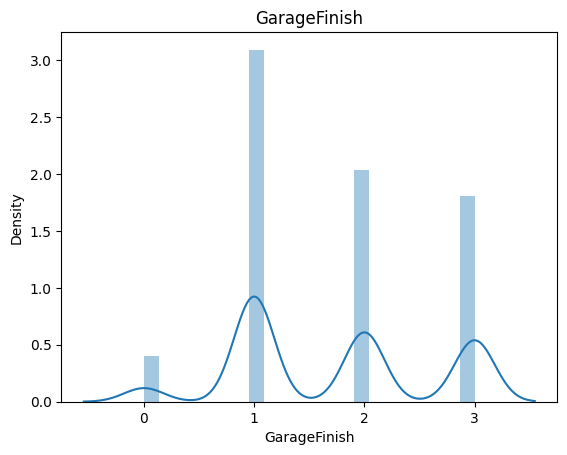

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


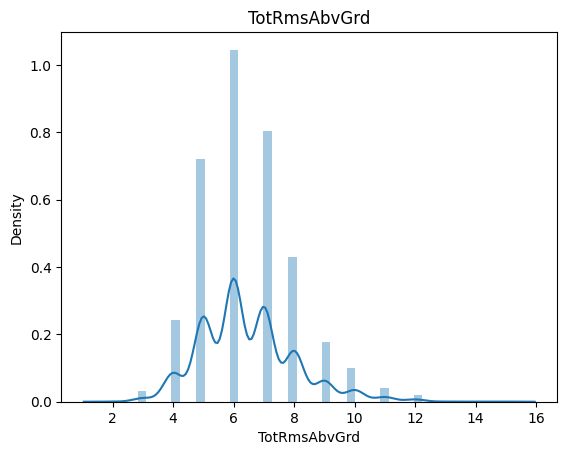

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


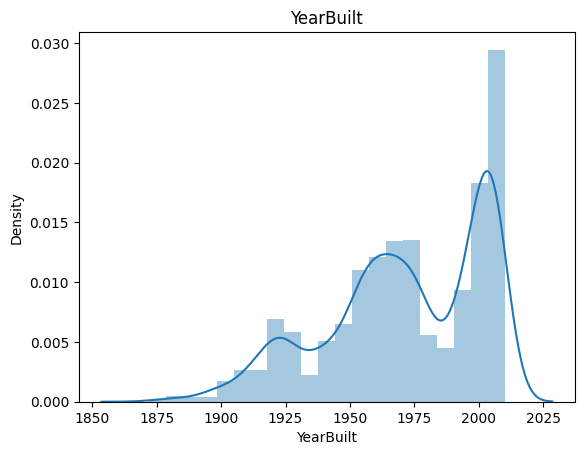

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


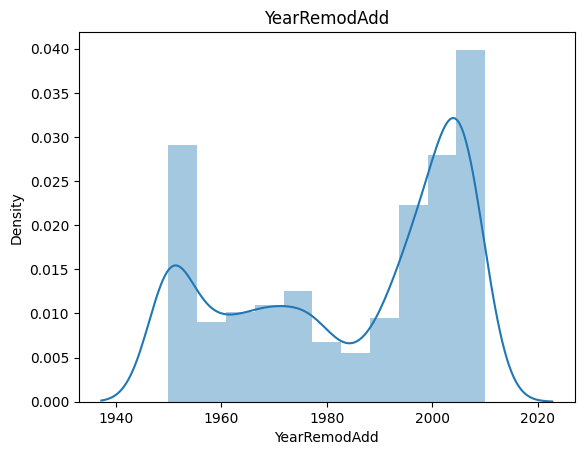

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


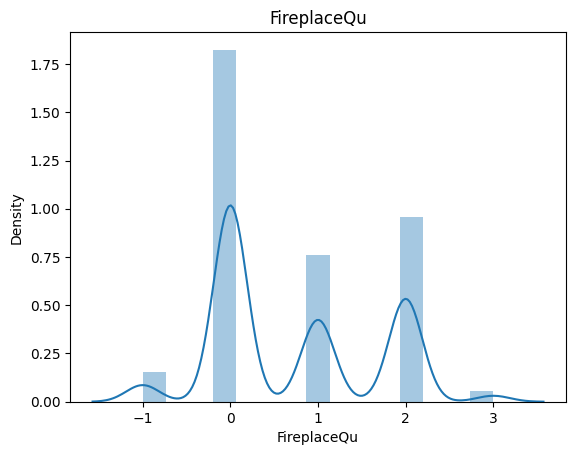

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


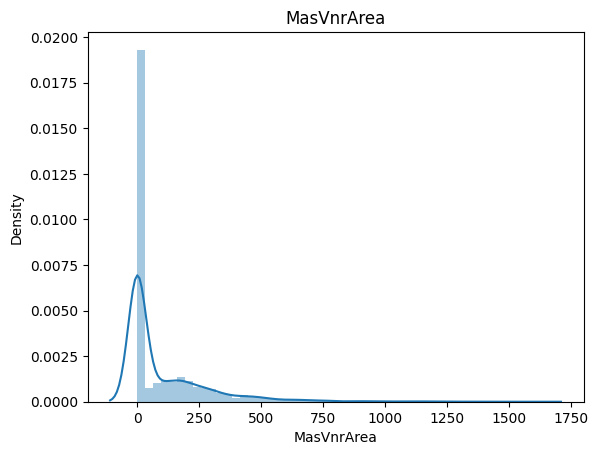

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


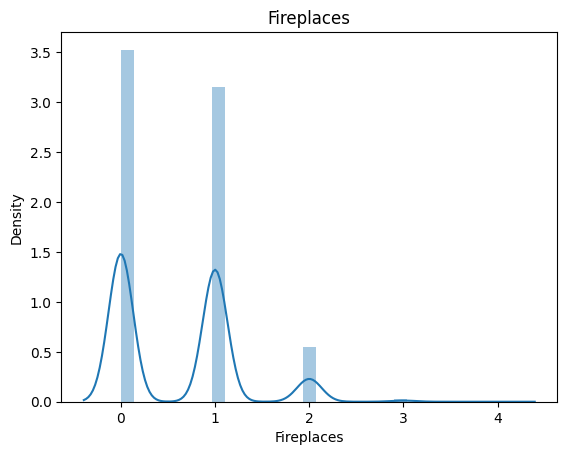

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


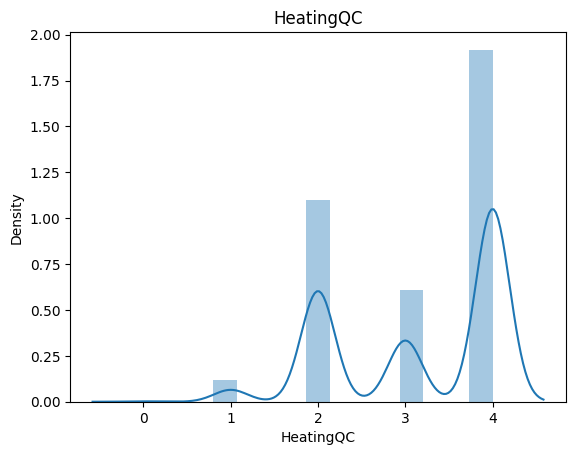

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


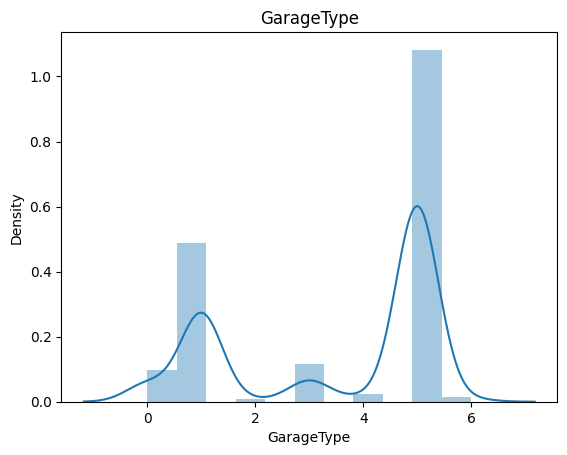

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


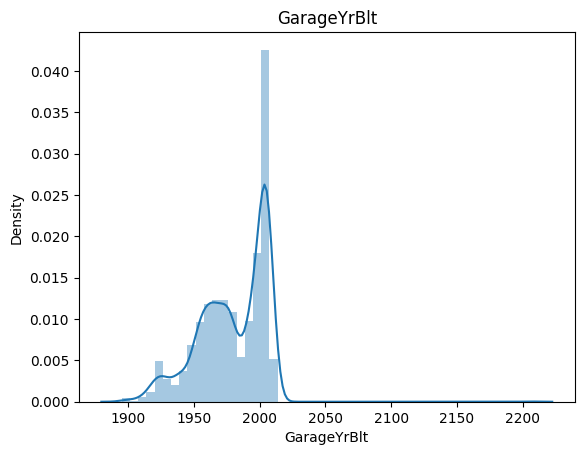

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


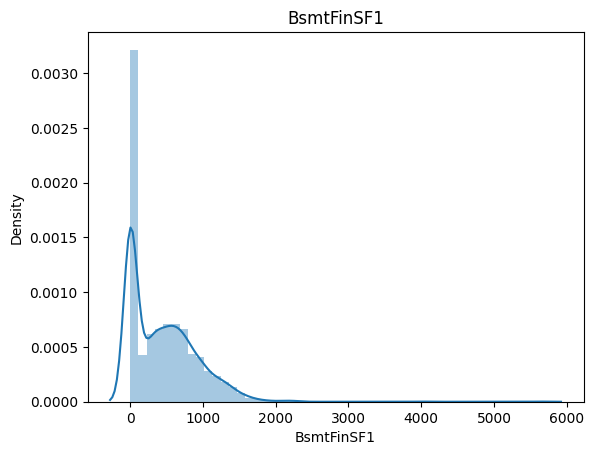

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


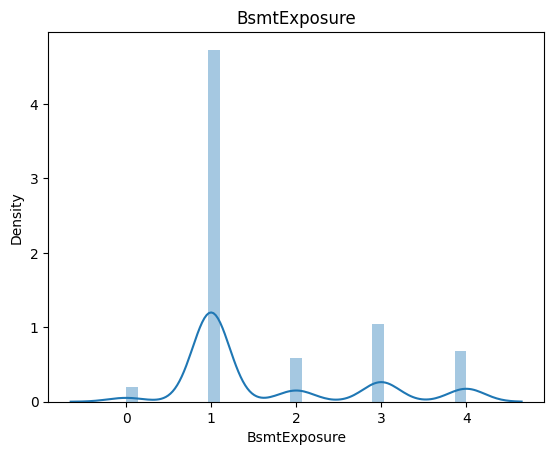

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


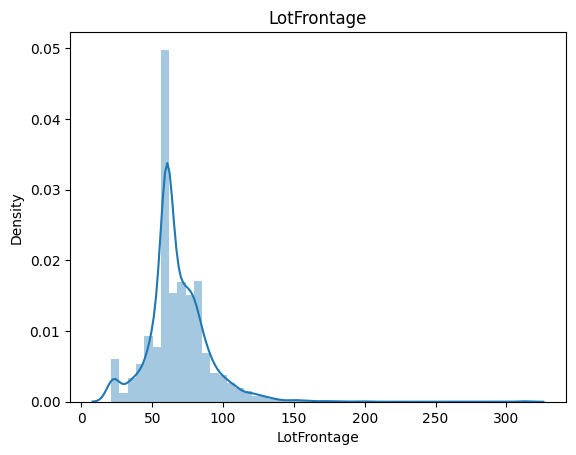

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


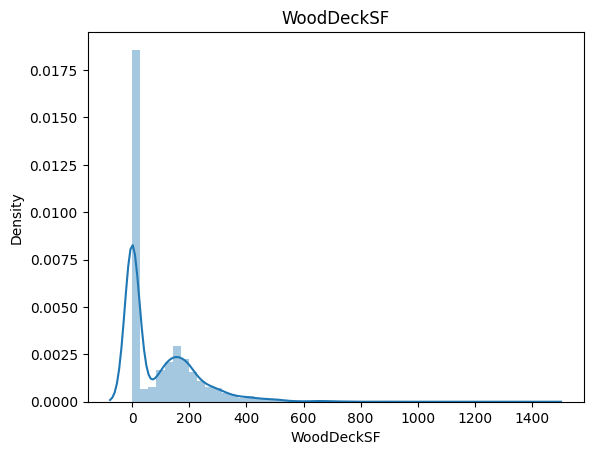

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


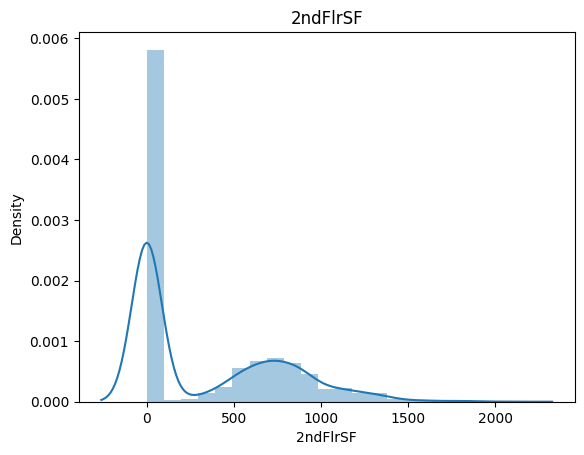

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


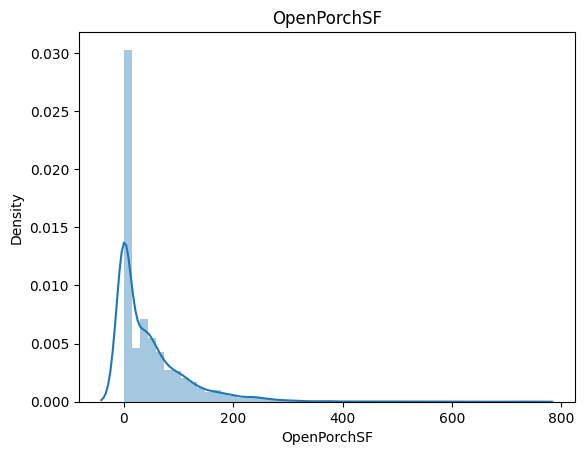

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


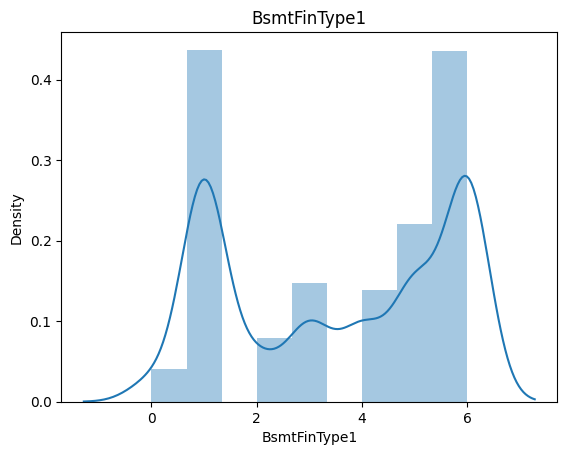

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


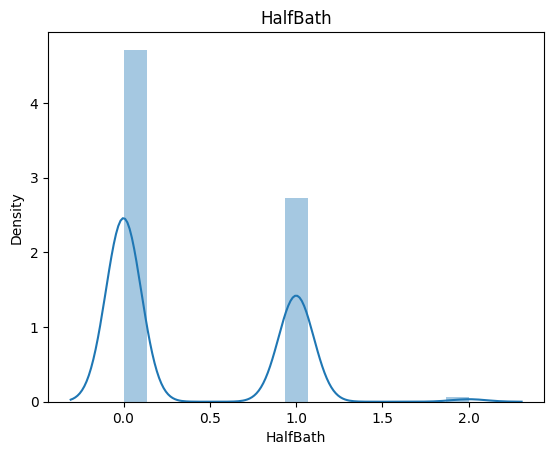

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


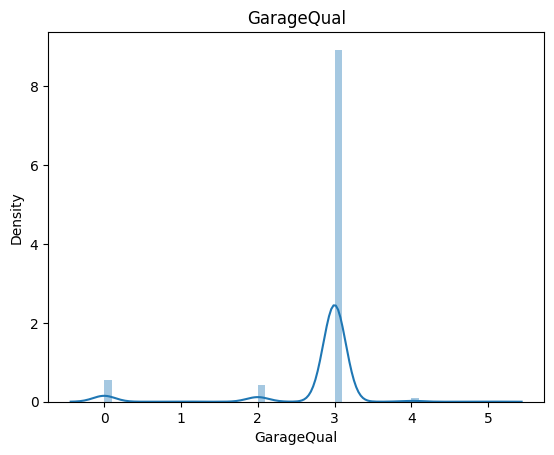

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


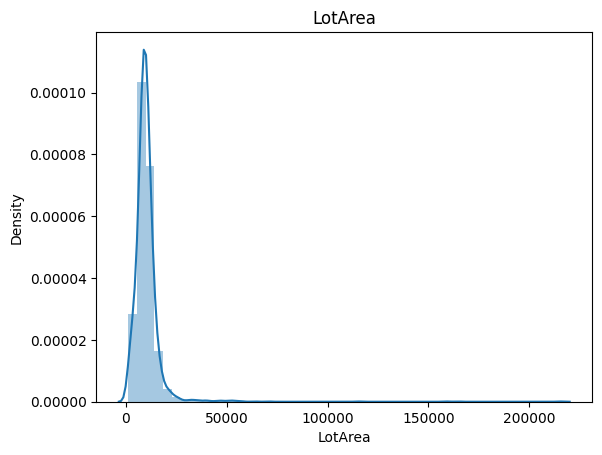

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


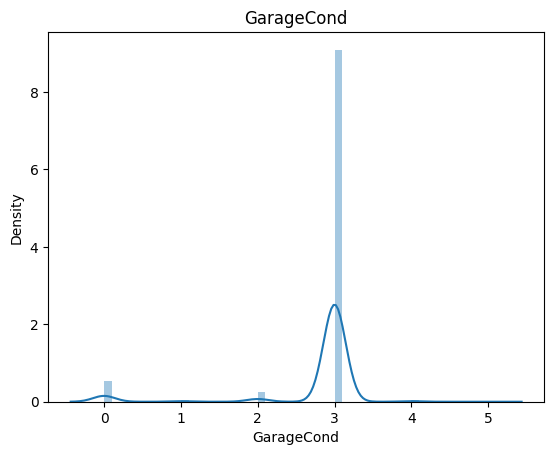

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


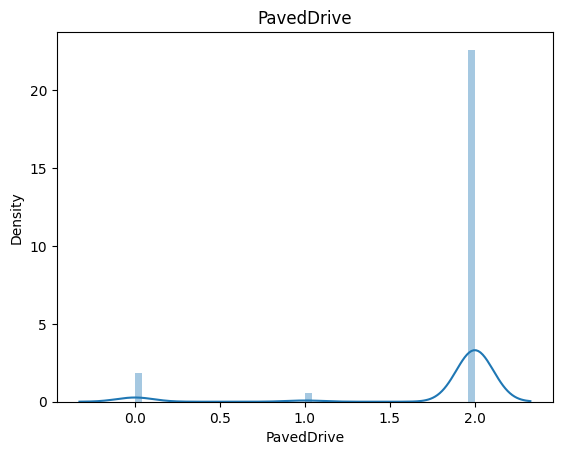

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


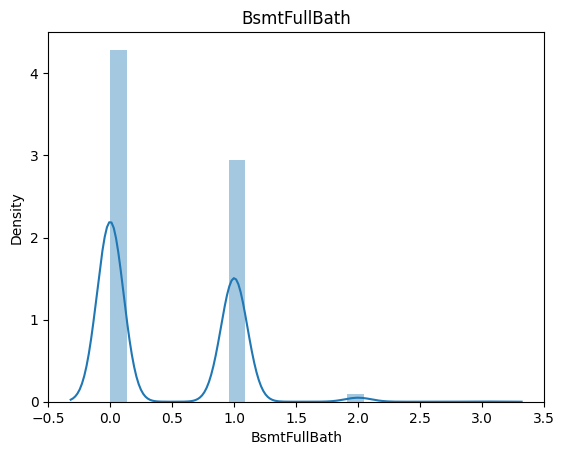

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


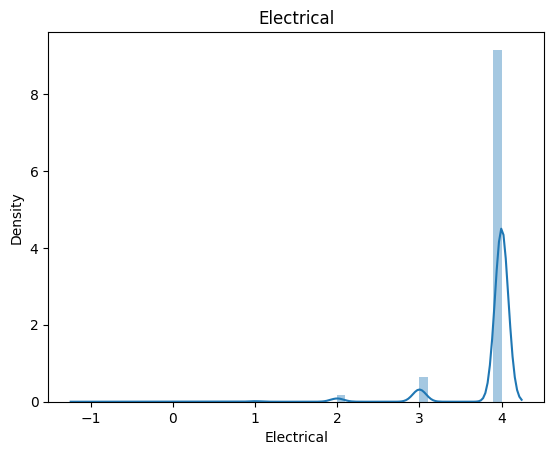

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


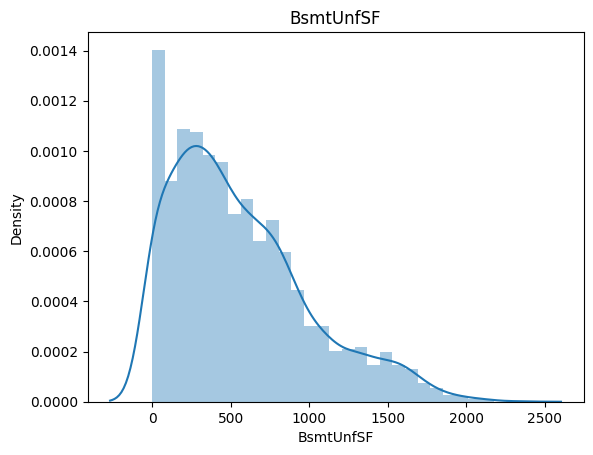

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


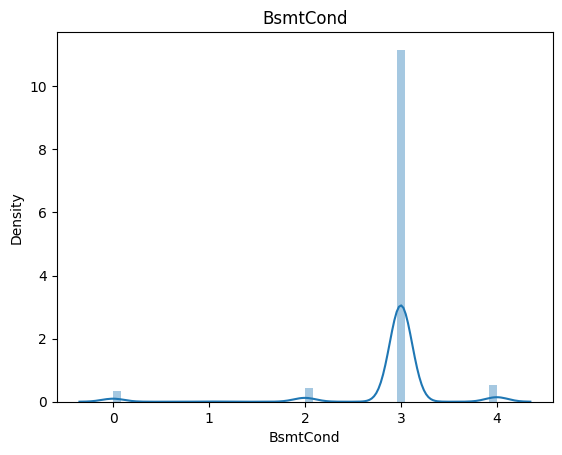

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


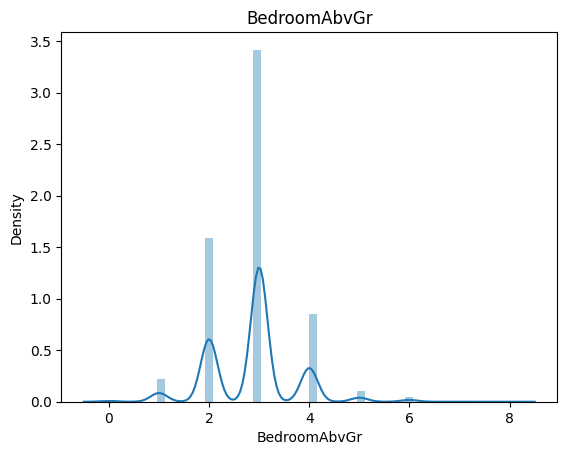

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


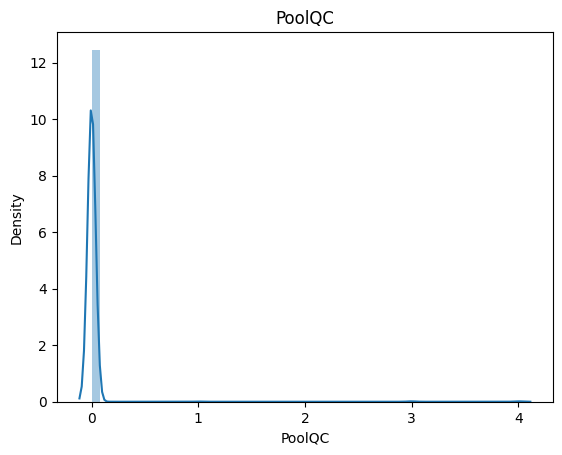

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


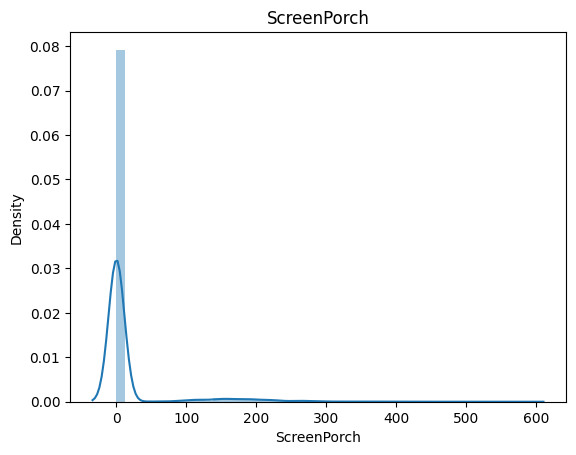

In [16]:
for i in top_40_features:
    sns.distplot(df[i])
    plt.title(i)  # Add feature name as title
    plt.show()  # Display the plot
    plt.close()  # Close the plot to avoid overlapping figures

In [17]:
def detect_and_cap_outliers(df, columns, num_stds=3):
    for col in columns:
        upper_limit = df[col].mean() + num_stds * df[col].std()
        lower_limit = df[col].mean() - num_stds * df[col].std()
        df.loc[df[col] > upper_limit, col] = upper_limit
        df.loc[df[col] < lower_limit, col] = lower_limit

    return df

In [18]:
columns_to_check = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 
                    '1stFlrSF', 'MasVnrArea', 'GarageYrBlt', 
                    'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
                    'SalePrice','FullBath', 'TotRmsAbvGrd', 
                    'HeatingQC', '2ndFlrSF', 'OpenPorchSF',
                    'LotArea', 'BsmtFullBath', 'ScreenPorch']

In [19]:
df = detect_and_cap_outliers(df.copy(), columns_to_check)

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


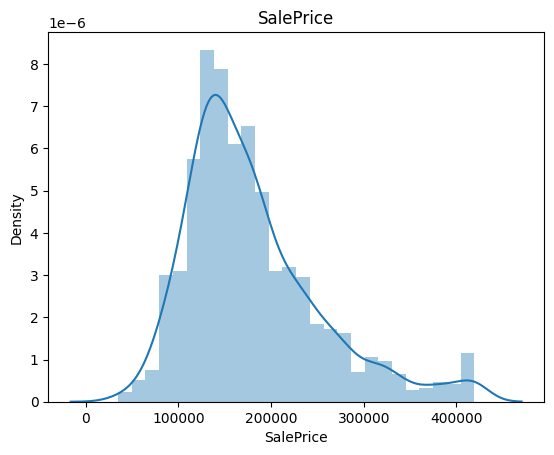

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


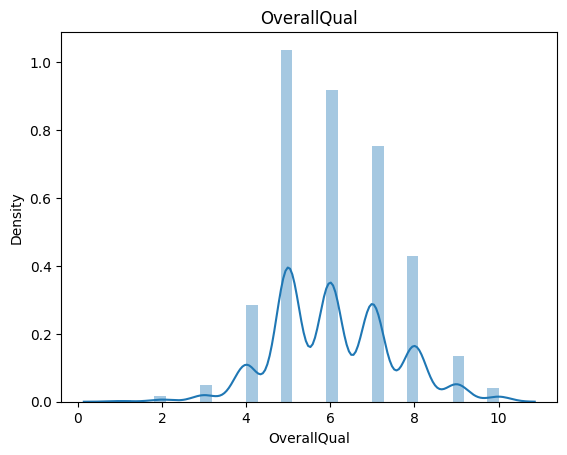

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


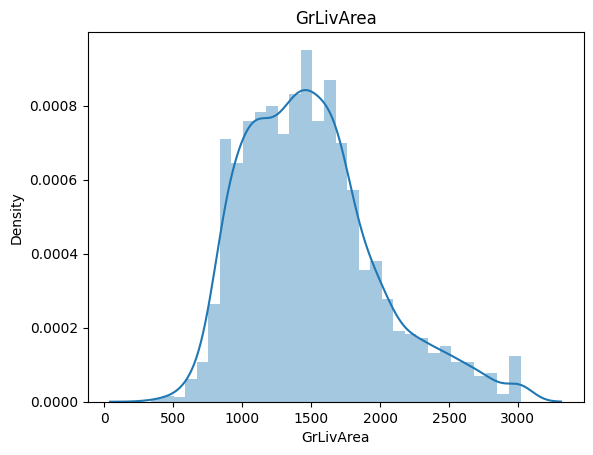

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


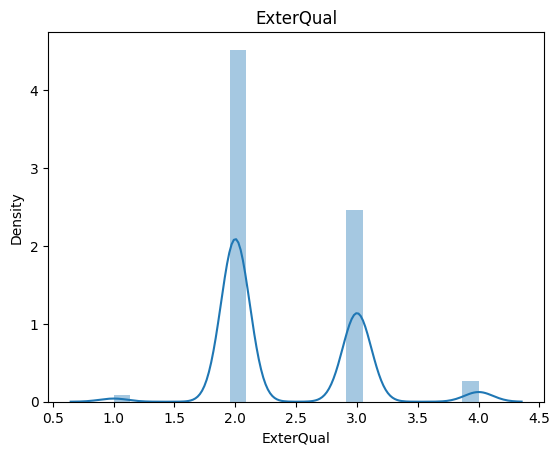

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


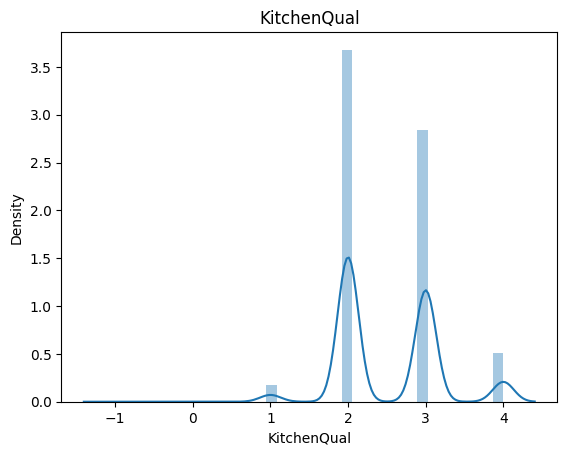

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


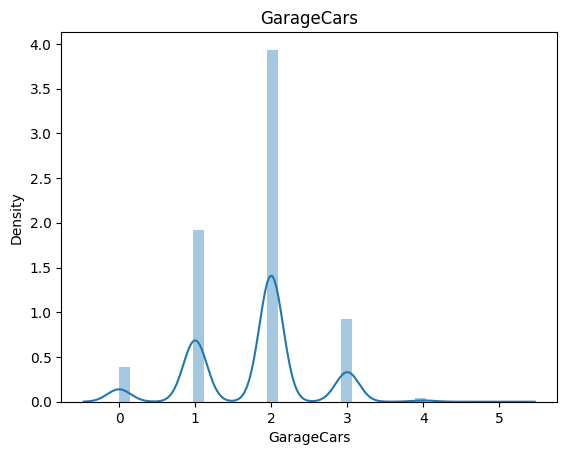

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


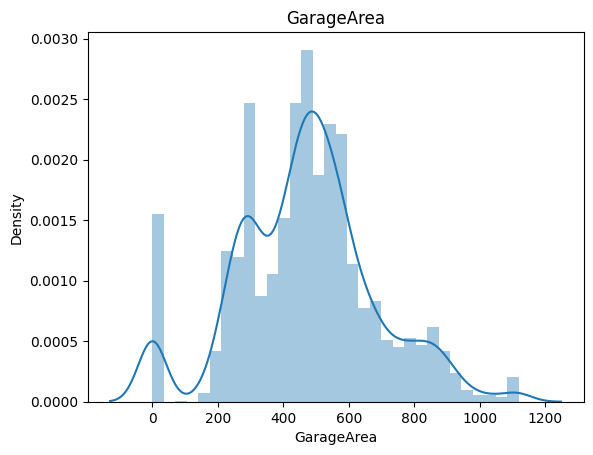

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


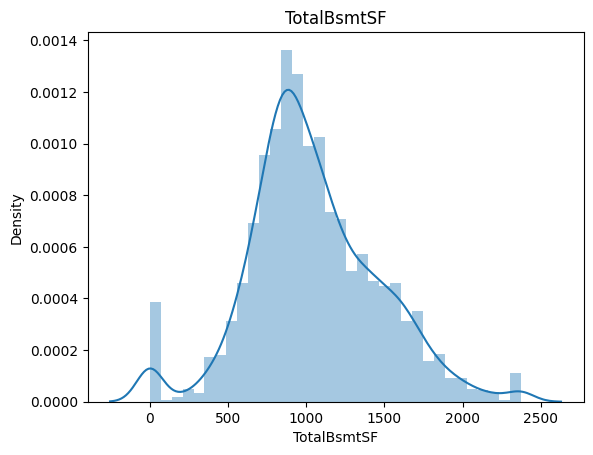

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


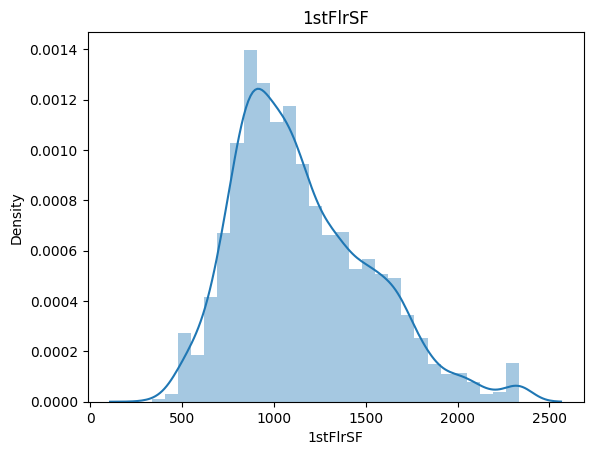

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


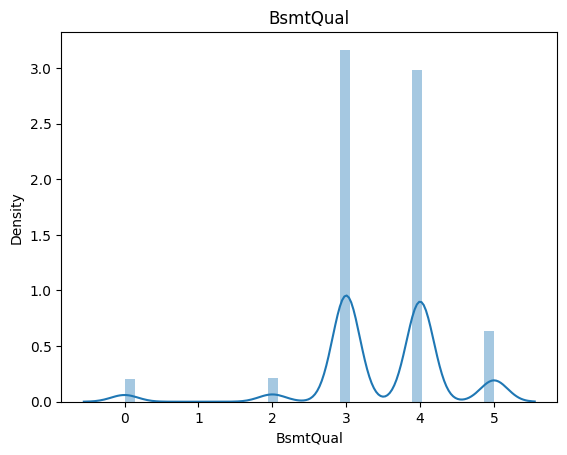

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


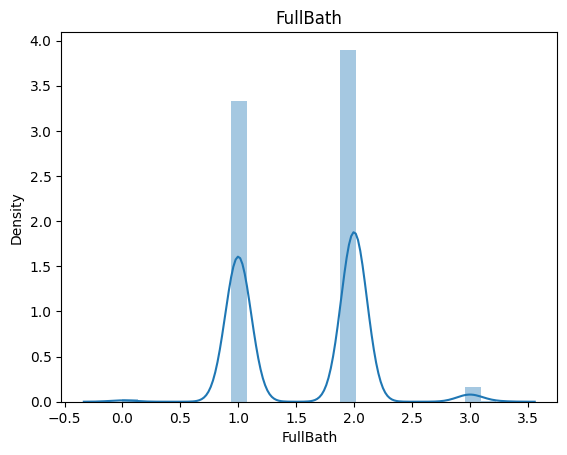

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


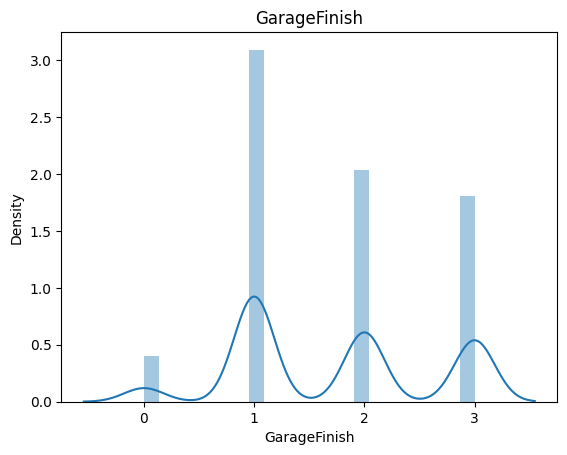

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


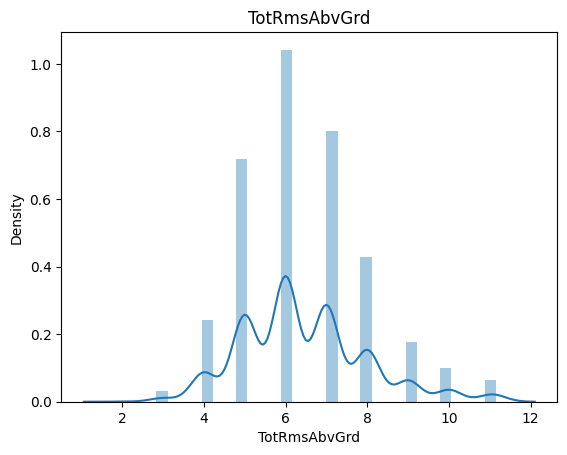

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


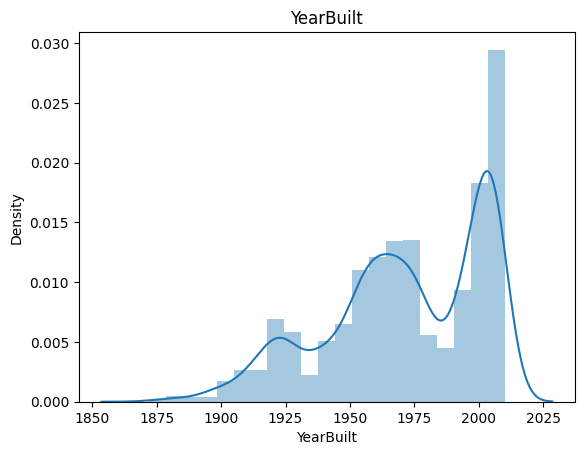

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


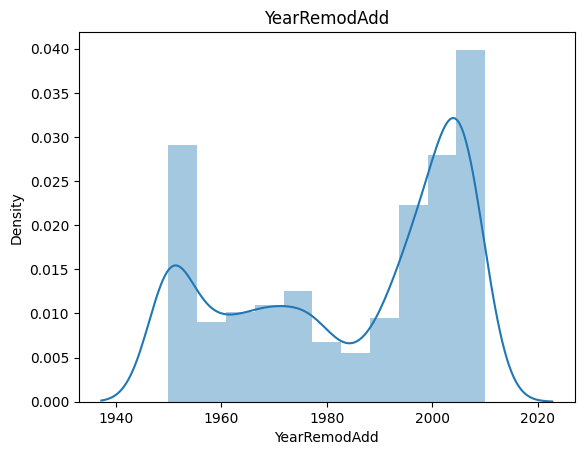

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


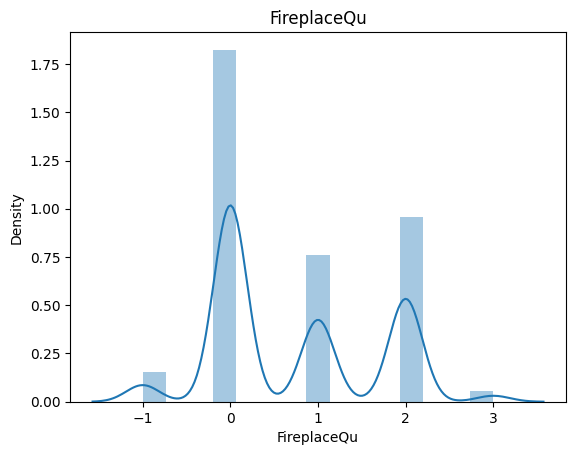

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


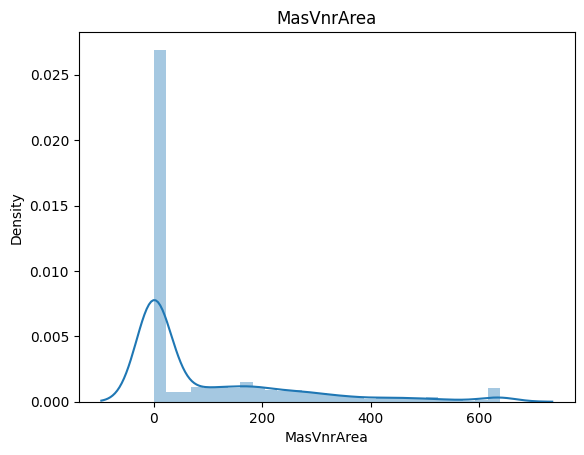

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


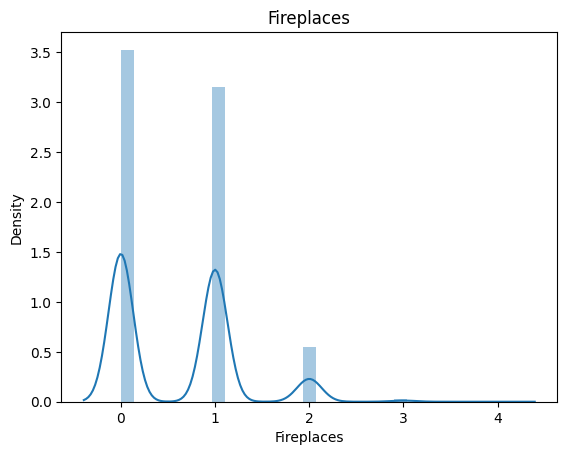

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


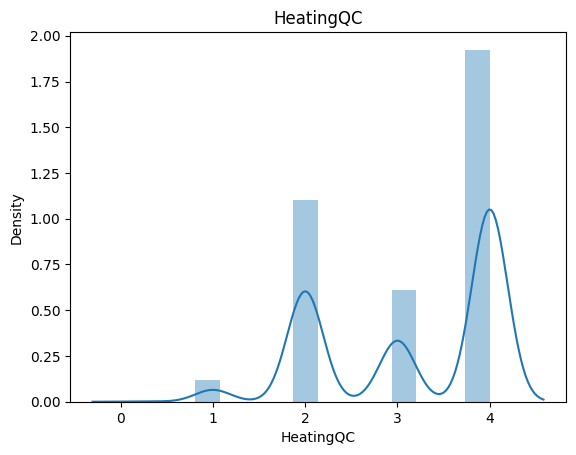

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


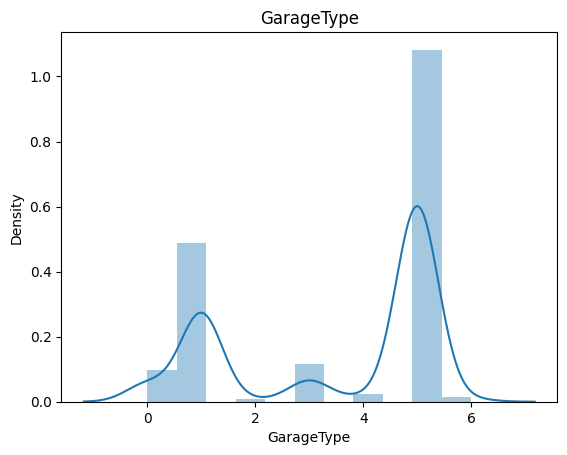

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


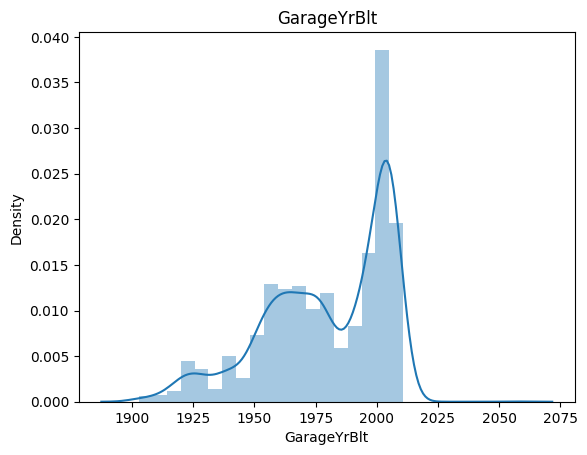

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


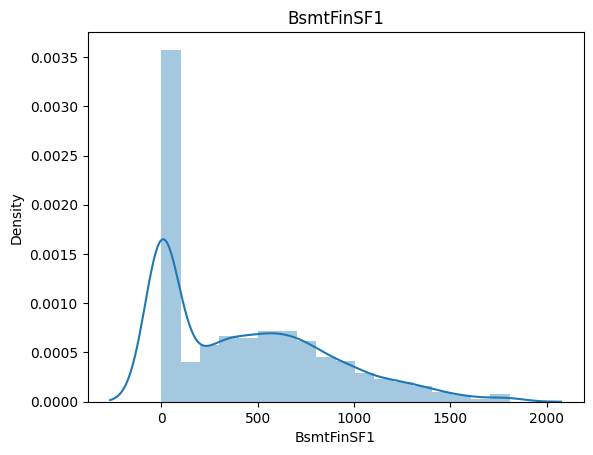

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


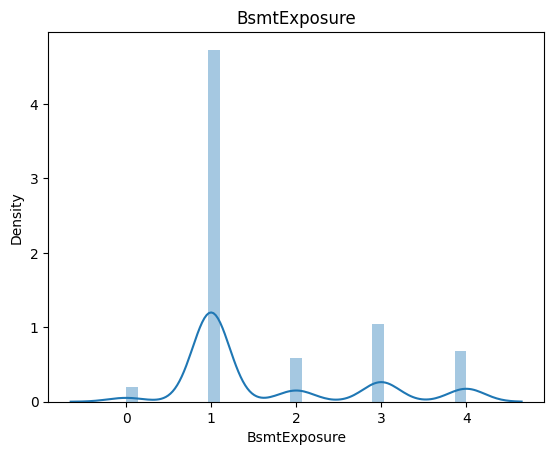

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


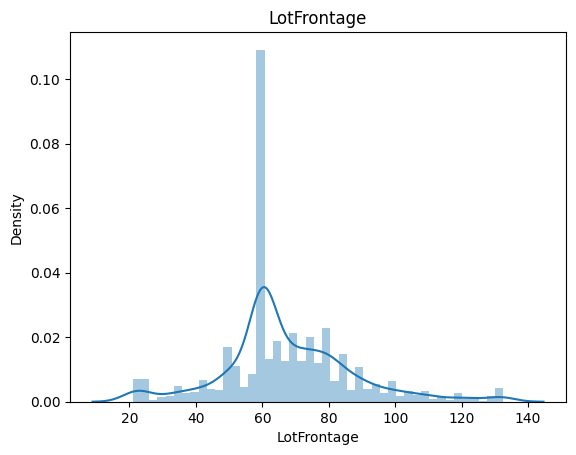

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


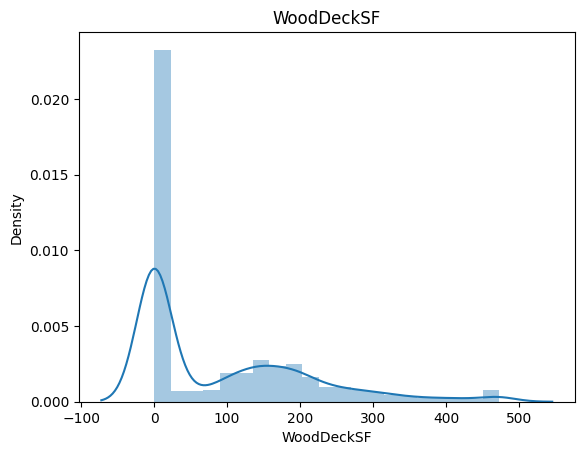

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


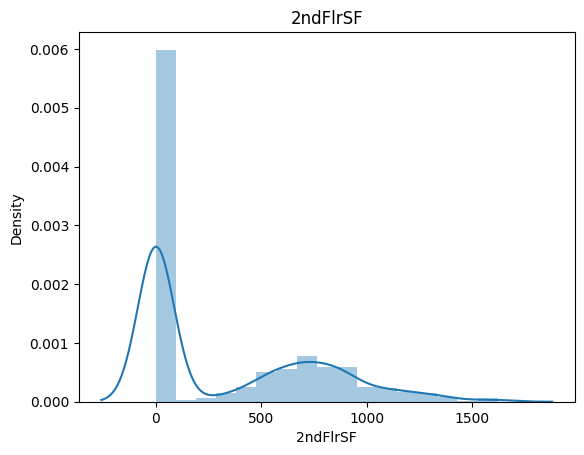

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


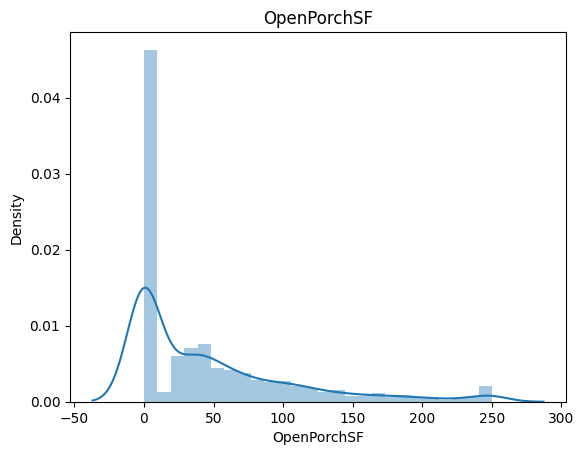

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


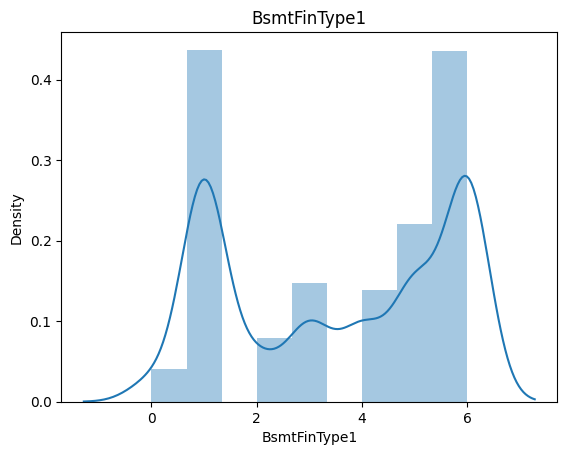

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


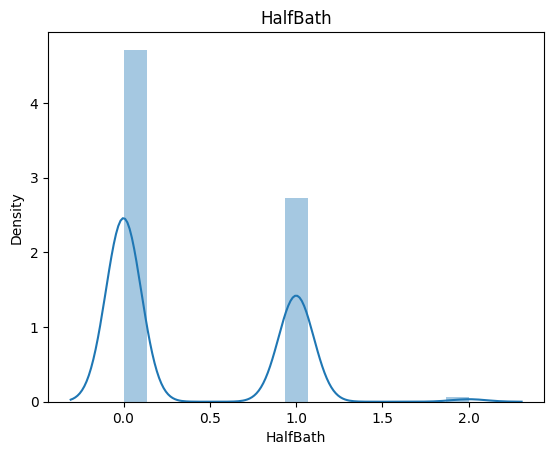

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


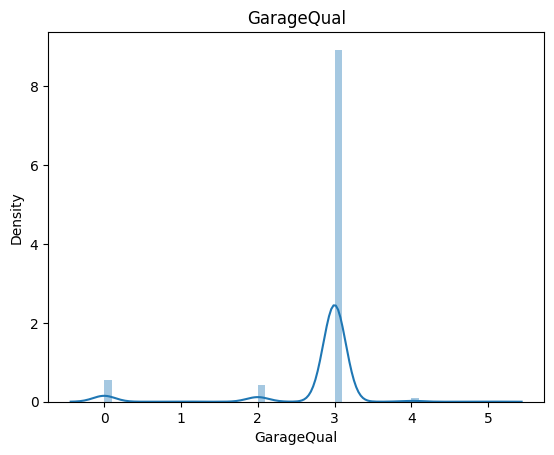

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


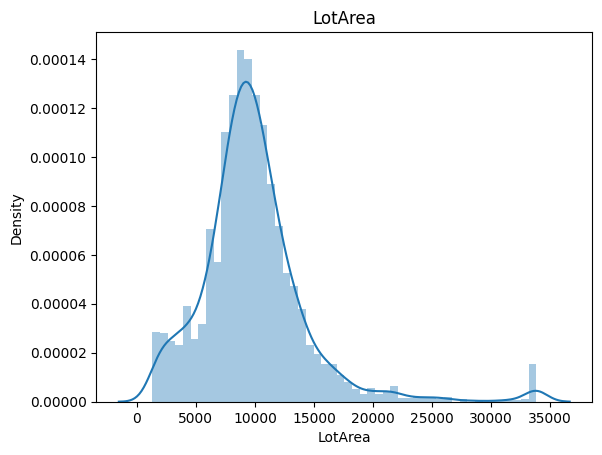

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


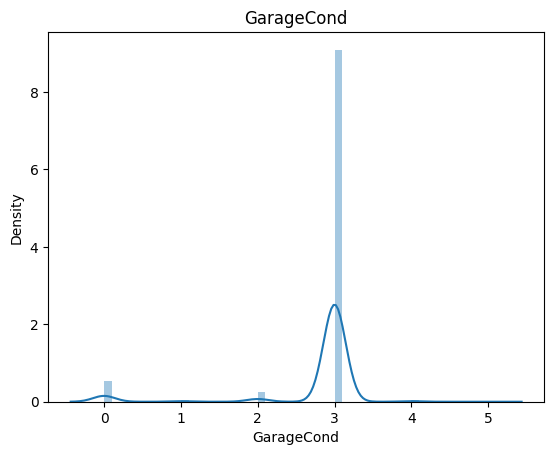

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


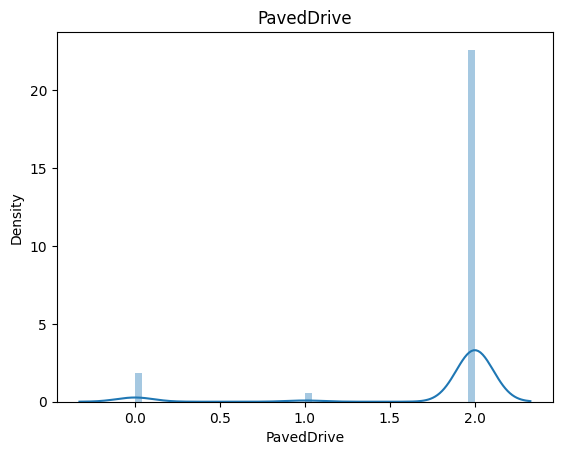

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


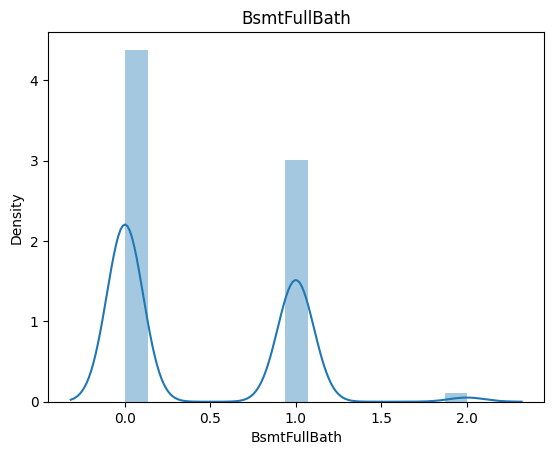

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


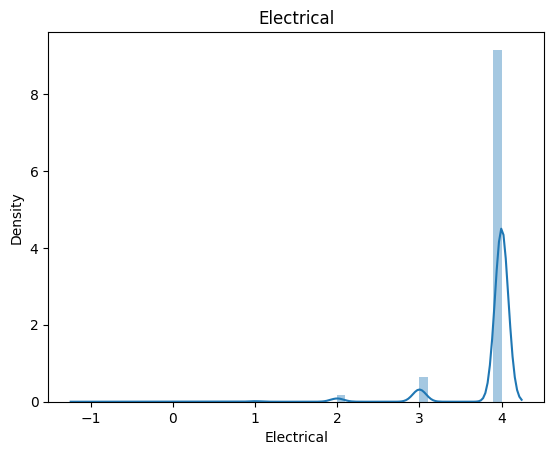

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


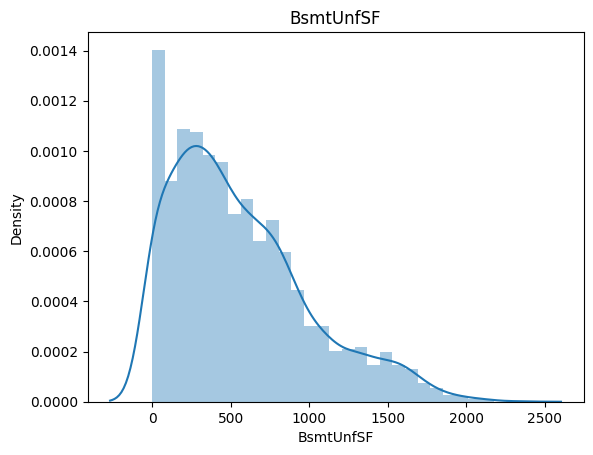

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


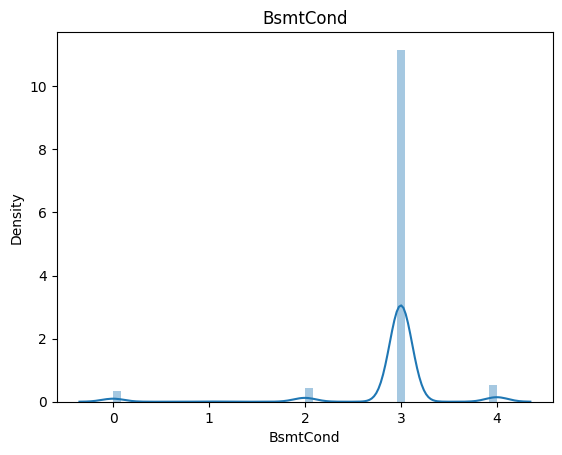

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


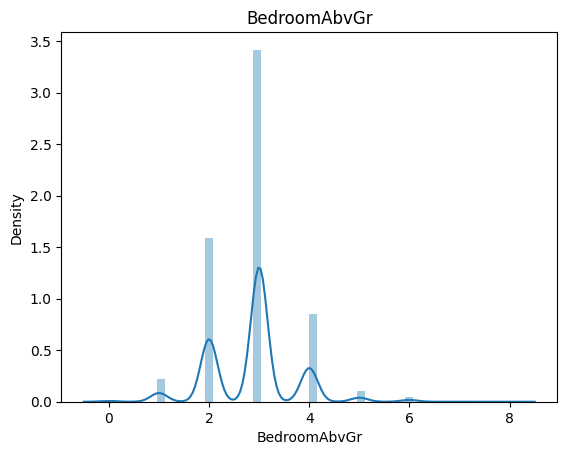

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


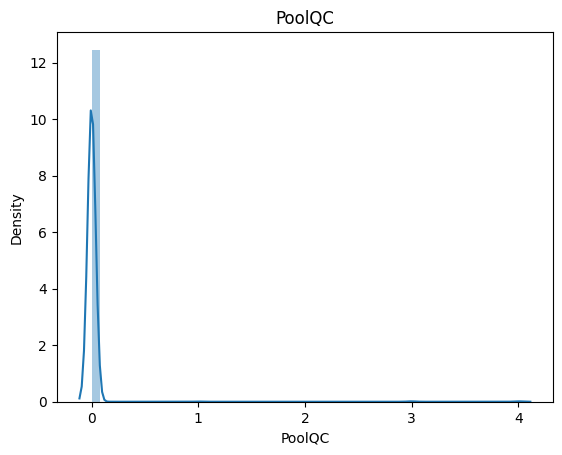

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


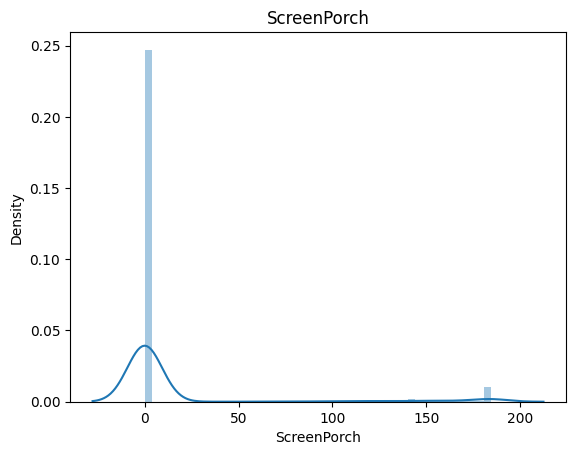

In [20]:
for i in top_40_features:
    sns.distplot(df[i])
    plt.title(i)  # Add feature name as title
    plt.show()  # Display the plot
    plt.close()  # Close the plot to avoid overlapping figures

In [21]:
new_df_40 = df[top_40_features]
new_df_40.head()

SalePrice  OverallQual  GrLivArea  ExterQual  KitchenQual  GarageCars  \
0   208500.0            7     1710.0          3            3         2.0   
1   181500.0            6     1262.0          2            2         2.0   
2   223500.0            7     1786.0          3            3         2.0   
3   140000.0            7     1717.0          2            3         3.0   
4   250000.0            8     2198.0          3            3         3.0   

   GarageArea  TotalBsmtSF  1stFlrSF  BsmtQual  FullBath  GarageFinish  \
0       548.0        856.0     856.0         4       2.0             2   
1       460.0       1262.0    1262.0         4       2.0             2   
2       608.0        920.0     920.0         4       2.0             2   
3       642.0        756.0     961.0         3       1.0             1   
4       836.0       1145.0    1145.0         4       2.0             2   

   TotRmsAbvGrd  YearBuilt  YearRemodAdd  FireplaceQu  MasVnrArea  Fireplaces  \
0           8.0       2003          2003            0       196.0           0   
1           6.0       1976          1976            1         0.0           1   
2           6.0       2001          2002            1       162.0           1   
3           7.0       1915          1970            2         0.0           1   
4           9.0       2000          2000            1       350.0           1   

   HeatingQC  GarageType  GarageYrBlt  BsmtFinSF1  BsmtExposure  LotFrontage  \
0        4.0           5       2003.0       706.0             1         65.0   
1        4.0           5       1976.0       978.0             4         80.0   
2        4.0           5       2001.0       486.0             2         68.0   
3        3.0           1       1998.0       216.0             1         60.0   
4        4.0           5       2000.0       655.0             3         84.0   

   WoodDeckSF  2ndFlrSF  OpenPorchSF  BsmtFinType1  HalfBath  GarageQual  \
0         0.0     854.0         61.0             6         1           3   
1       298.0       0.0          0.0             5         0           3   
2         0.0     866.0         42.0             6         1           3   
3         0.0     756.0         35.0             5         0           3   
4       192.0    1053.0         84.0             6         1           3   

   LotArea  GarageCond  PavedDrive  BsmtFullBath  Electrical  BsmtUnfSF  \
0   8450.0           3           2           1.0           4      150.0   
1   9600.0           3           2           0.0           4      284.0   
2  11250.0           3           2           1.0           4      434.0   
3   9550.0           3           2           1.0           4      540.0   
4  14260.0           3           2           1.0           4      490.0   

   BsmtCond  BedroomAbvGr  PoolQC  ScreenPorch  
0         3             3       0          0.0  
1         3             3       0          0.0  
2         3             3       0          0.0  
3         4             3       0          0.0  
4         3             4       0          0.0

In [22]:
new_df_40.drop(columns=['SalePrice', 'GarageCars', 'BsmtFinType1', 'Fireplaces'],inplace=True)
scaling_features = [i for i in new_df_40.columns if df[i].dtype != 'O']
scaling_features

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/2038709612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_40.drop(columns=['SalePrice', 'GarageCars', 'BsmtFinType1', 'Fireplaces'],inplace=True)


['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'FireplaceQu',
 'MasVnrArea',
 'HeatingQC',
 'GarageType',
 'GarageYrBlt',
 'BsmtFinSF1',
 'BsmtExposure',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'GarageQual',
 'LotArea',
 'GarageCond',
 'PavedDrive',
 'BsmtFullBath',
 'Electrical',
 'BsmtUnfSF',
 'BsmtCond',
 'BedroomAbvGr',
 'PoolQC',
 'ScreenPorch']

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit(new_df_40[scaling_features])
scaled_data = scaler.transform(df[scaling_features])
scaled_data

array([[0.66666667, 0.51249333, 0.66666667, ..., 0.375     , 0.        ,
        0.        ],
       [0.55555556, 0.34563504, 0.33333333, ..., 0.375     , 0.        ,
        0.        ],
       [0.66666667, 0.54079965, 0.66666667, ..., 0.375     , 0.        ,
        0.        ],
       ...,
       [0.44444444, 0.33148188, 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.44444444, 0.23687919, 0.33333333, ..., 0.375     , 0.        ,
        0.        ],
       [0.66666667, 0.62050428, 0.33333333, ..., 0.375     , 0.        ,
        0.        ]])

In [25]:
# Check that the shapes are consistent

print('df_final shape:', df.shape)
print('df_train shape:', data_train.shape)
print('df_test shape:',  data_test.shape)

X_Train = pd.DataFrame(new_df_40[:1460])
X_Test  = pd.DataFrame(new_df_40[1460:])
Y_Train = data_train['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_Train.shape)
print('Y_train shape:', Y_Train.shape)
print('X_test shape:',  X_Test.shape)

df_final shape: (2919, 81)
df_train shape: (1460, 81)
df_test shape: (1459, 80)

Check that the datasets are consistent:

X_train shape (1460, 36)
Y_train shape: (1460,)
X_test shape: (1459, 36)


In [26]:
X_Train.shape

(1460, 36)

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_Train, train_size=0.8, test_size=0.2,random_state=0)
     

In [28]:
X_train.shape, X_test.shape

((1168, 36), (292, 36))

In [29]:
X_test.head()

OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  TotalBsmtSF  \
529            6     2515.0          3            2       484.0       2035.0   
491            6     1578.0          2            1       240.0        806.0   
459            5     1203.0          2            3       352.0        709.0   
279            7     2022.0          2            2       505.0       1160.0   
655            6     1092.0          2            2       264.0        525.0   

        1stFlrSF  BsmtQual  FullBath  GarageFinish  TotRmsAbvGrd  YearBuilt  \
529  2336.667942         3       3.0             2           9.0       1957   
491   958.000000         3       1.0             1           5.0       1941   
459   979.000000         3       1.0             1           5.0       1950   
279  1156.000000         4       2.0             3           8.0       1977   
655   525.000000         3       1.0             1           6.0       1971   

     YearRemodAdd  FireplaceQu  MasVnrArea  HeatingQC  GarageType  \
529          1975            1         0.0        2.0           5   
491          1950            1         0.0        2.0           5   
459          1950            1       161.0        2.0           1   
279          1977            1       299.0        4.0           5   
655          1971            0       381.0        2.0           1   

     GarageYrBlt  BsmtFinSF1  BsmtExposure  LotFrontage  WoodDeckSF  2ndFlrSF  \
529       1975.0      1219.0             1         60.0         0.0       0.0   
491       1941.0       403.0             1         79.0         0.0     620.0   
459       1950.0       185.0             1         60.0         0.0     224.0   
279       1977.0       392.0             1         83.0       288.0     866.0   
655       1971.0         0.0             1         21.0         0.0     567.0   

     OpenPorchSF  HalfBath  GarageQual  LotArea  GarageCond  PavedDrive  \
529          0.0         0           3  32668.0           3           2   
491          0.0         0           3   9490.0           3           2   
459          0.0         0           3   7015.0           3           2   
279        117.0         1           3  10005.0           3           2   
655          0.0         1           3   1680.0           3           2   

     BsmtFullBath  Electrical  BsmtUnfSF  BsmtCond  BedroomAbvGr  PoolQC  \
529           1.0           4      816.0         3             4       0   
491           1.0           3      238.0         3             3       0   
459           1.0           4      524.0         3             3       0   
279           0.0           4      768.0         3             4       0   
655           0.0           4      525.0         3             3       0   

     ScreenPorch  
529          0.0  
491          0.0  
459          0.0  
279          0.0  
655          0.0

In [30]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [31]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [32]:
y_pred = linear_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_pred, Y_test)

22581.189057696978

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
forest_regressor = RandomForestRegressor(n_estimators=10)  # Adjust hyperparameters as needed

In [36]:
forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10)

In [37]:
y_pred_1 = forest_regressor.predict(X_test)

In [38]:
mae(y_pred_1, Y_test)

19175.217465753423

In [39]:
!pip install xgboost
from xgboost import XGBRegressor


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [40]:
model_v = XGBRegressor()

In [41]:
model_v.learning_rate = 0.1
model_v.n_estimators = 60

In [42]:
model_v.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred_v = model_v.predict(X_test)

In [44]:
mae(y_pred_v, Y_test)

17545.964442422945

In [45]:
from sklearn.metrics import r2_score

In [46]:
# R2 score of linear_model.
r2_linear_model = r2_score(Y_test, y_pred)
print(r2_linear_model)

0.7777199265443098


Text(0.5, 1.0, 'Linear Regression Model')

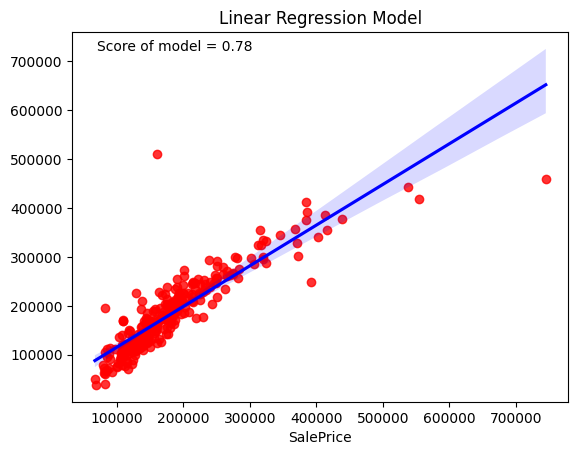

In [47]:
# reg plot of linear model
plt.text(0.05, 0.95, f"Score of model = {r2_linear_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred, color='red', line_kws={'color': 'blue'})
plt.title('Linear Regression Model')

In [48]:
# R2 score of random_forest_model.
r2_random_model = r2_score(Y_test, y_pred_1)
print(r2_random_model)

0.8610313121527677


Text(0.5, 1.0, 'Random Forest Model')

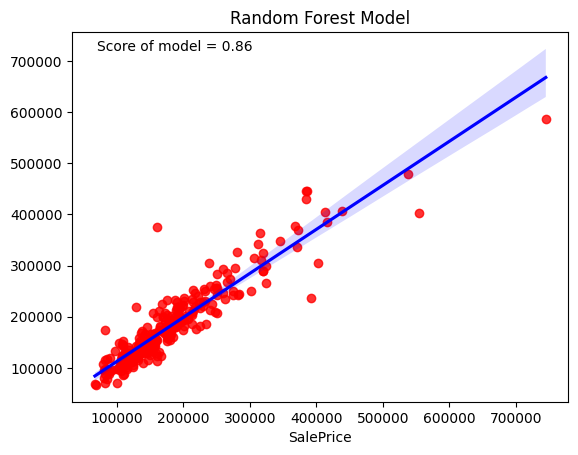

In [49]:
# reg plot for random forest model.
plt.text(0.05, 0.95, f"Score of model = {r2_random_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred_1, color='red', line_kws={'color': 'blue'})
plt.title('Random Forest Model')

In [50]:
# R2 score of xgboost_model.
r2_xgboost_model = r2_score(Y_test, y_pred_v)
print(r2_xgboost_model)

0.8575336240072179


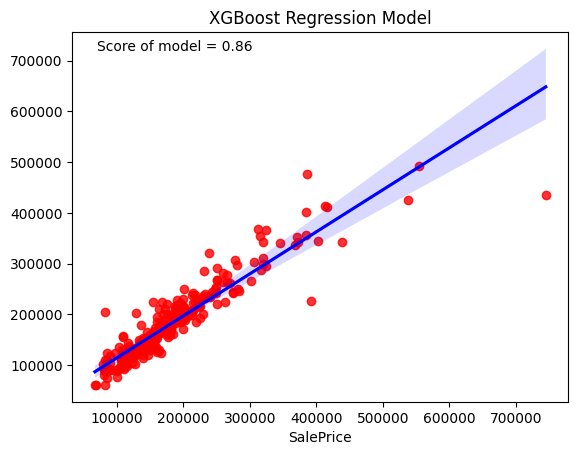

In [51]:
# reg plot for XGBRegressor model.
plt.text(0.05, 0.95, f"Score of model = {r2_xgboost_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred_v, color='red', line_kws={'color': 'blue'})
plt.title('XGBoost Regression Model')
plt.show()

In [52]:
from sklearn.linear_model import Ridge, Lasso

In [53]:
lasso_model = Lasso(alpha=0.1)

In [54]:
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [55]:
lasso_predict = lasso_model.predict(X_test)

In [56]:
mae(lasso_predict, Y_test)

22580.987542920026

In [57]:
ridge_model = Ridge(alpha=1.0)

In [58]:
ridge_model = Ridge(alpha=1.0)

In [59]:
ridge_model.fit(X_train, Y_train)

Ridge()

In [60]:
ridge_predict = ridge_model.predict(X_test)

In [61]:
# R2 score of Ridge_Regression_model.
r2_ridge_model = r2_score(Y_test, ridge_predict)
print(r2_ridge_model)

0.777765501397229


In [62]:
# R2 score of Lasso_Regression_model.
r2_lasso_model = r2_score(Y_test, lasso_predict)
print(r2_lasso_model)

0.7777209690564846


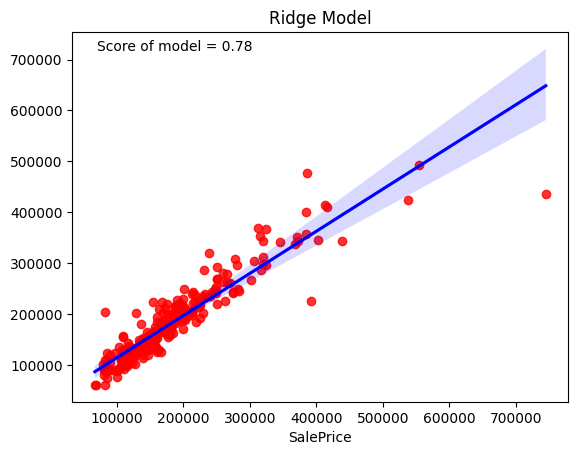

In [63]:
# reg plot for Ridge_regression model.
plt.text(0.05, 0.95, f"Score of model = {r2_ridge_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred_v, color='red', line_kws={'color': 'blue'})
plt.title('Ridge Model')
plt.show()

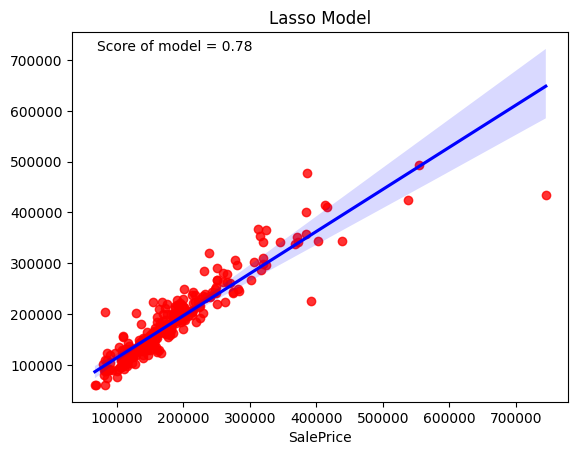

In [64]:
# reg plot for lasso model.
plt.text(0.05, 0.95, f"Score of model = {r2_lasso_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred_v, color='red', line_kws={'color': 'blue'})
plt.title('Lasso Model')
plt.show()

## Now, let's play with all features. Wase to I should do this initially. But It's good practise if you do 
## with all features in beginning!👍

In [65]:
df_all_features = df.copy()
df_all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   float64
 5   Street         2919 non-null   int8   
 6   Alley          2919 non-null   int8   
 7   LotShape       2919 non-null   int8   
 8   LandContour    2919 non-null   int8   
 9   Utilities      2919 non-null   int8   
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   int8   
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [66]:
pd.set_option('display.max_rows', None)

In [67]:
obj_features = [i for i in df_all_features.columns if df_all_features[i].dtype == 'O']
df_all_features.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60       RL         65.0   8450.0       1      0         3   
1   2          20       RL         80.0   9600.0       1      0         3   
2   3          60       RL         68.0  11250.0       1      0         2   
3   4          70       RL         60.0   9550.0       1      0         2   
4   5          60       RL         84.0  14260.0       1      0         2   

   LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0            3          3    Inside          2      CollgCr       Norm   
1            3          3       FR2          2      Veenker      Feedr   
2            3          3    Inside          2      CollgCr       Norm   
3            3          3    Corner          2      Crawfor       Norm   
4            3          3       FR2          2      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd         NA   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng         NA   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          3          2      PConc         4         3   
1         0.0          2          2     CBlock         4         3   
2       162.0          3          2      PConc         4         3   
3         0.0          2          2     BrkTil         3         4   
4       350.0          3          2      PConc         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6       706.0             1         0.0   
1             4             5       978.0             1         0.0   
2             2             6       486.0             1         0.0   
3             1             5       216.0             1         0.0   
4             3             6       655.0             1         0.0   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir  Electrical  1stFlrSF  \
0      150.0        856.0    GasA        4.0          Y           4     856.0   
1      284.0       1262.0    GasA        4.0          Y           4    1262.0   
2      434.0        920.0    GasA        4.0          Y           4     920.0   
3      540.0        756.0    GasA        3.0          Y           4     961.0   
4      490.0       1145.0    GasA        4.0          Y           4    1145.0   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0     854.0             0     1710.0           1.0           0.0       2.0   
1       0.0             0     1262.0           0.0           1.0       2.0   
2     866.0             0     1786.0           1.0           0.0       2.0   
3     756.0             0     1717.0           1.0           0.0       1.0   
4    1053.0             0     2198.0           1.0           0.0       2.0   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            3           8.0   
1         0             3             1            2           6.0   
2         1             3             1            3           6.0   
3         0             3             1            3           7.0   
4         1             4             1            3           

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder_v1 = LabelEncoder()

In [69]:
for i in obj_features:
    df_all_features[i] = encoder_v1.fit_transform(df_all_features[i])

In [70]:
df_all_features.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         4         65.0   8450.0       1      0         3   
1   2          20         4         80.0   9600.0       1      0         3   
2   3          60         4         68.0  11250.0       1      0         2   
3   4          70         4         60.0   9550.0       1      0         2   
4   5          60         4         84.0  14260.0       1      0         2   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          3          4          2             5           2   
1            3          3          2          2            24           1   
2            3          3          4          2             5           2   
3            3          3          0          2             6           2   
4            3          3          2          2            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   
3           2         0           5            7            5       1915   
4           2         0           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           13           14           1   
1          1976          1         1            8            8           2   
2          2002          1         1           13           14           1   
3          1970          1         1           14           16           2   
4          2000          1         1           13           14           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          3          2           2         4         3   
1         0.0          2          2           1         4         3   
2       162.0          3          2           2         4         3   
3         0.0          2          2           0         3         4   
4       350.0          3          2           2         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6       706.0             1         0.0   
1             4             5       978.0             1         0.0   
2             2             6       486.0             1         0.0   
3             1             5       216.0             1         0.0   
4             3             6       655.0             1         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        1        4.0           1           4   
1      284.0       1262.0        1        4.0           1           4   
2      434.0        920.0        1        4.0           1           4   
3      540.0        756.0        1        3.0           1           4   
4      490.0       1145.0        1        4.0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0             0     1710.0           1.0           0.0   
1    1262.0       0.0             0     1262.0           0.0           1.0   
2     920.0     866.0             0     1786.0           1.0           0.0   
3     961.0     756.0             0     1717.0           1.0           0.0   
4    1145.0    1053.0             0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       2.0         1             3             1            3           8.0   
1       2.0         0             3             1            2           6.0   
2       2.0         1             3             1            3           6.0   
3       1.0         0             3             1            3 

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


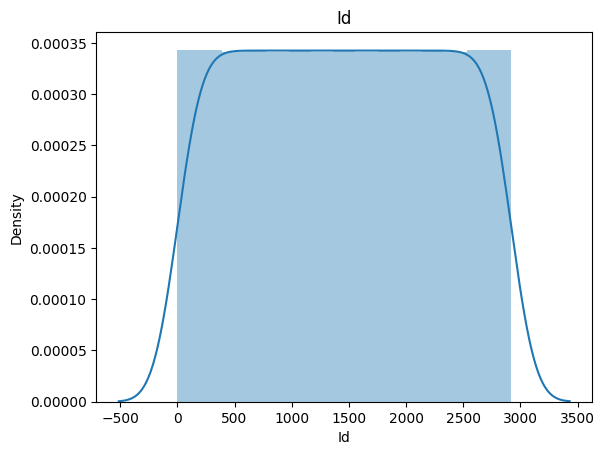

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


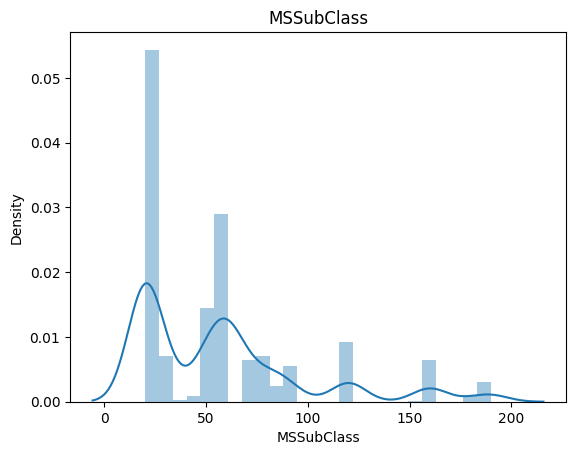

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


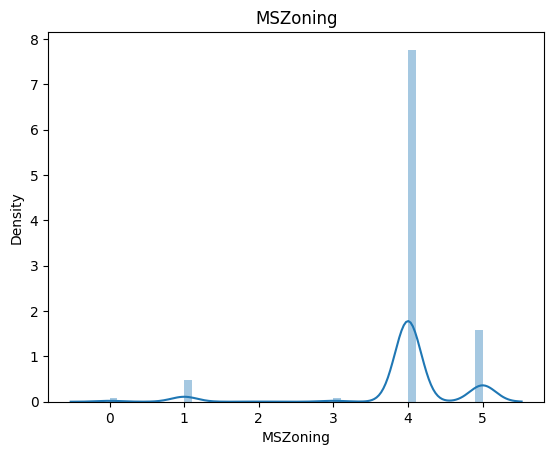

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


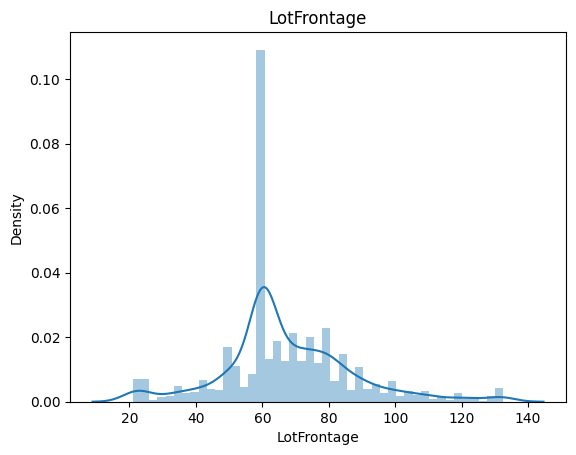

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


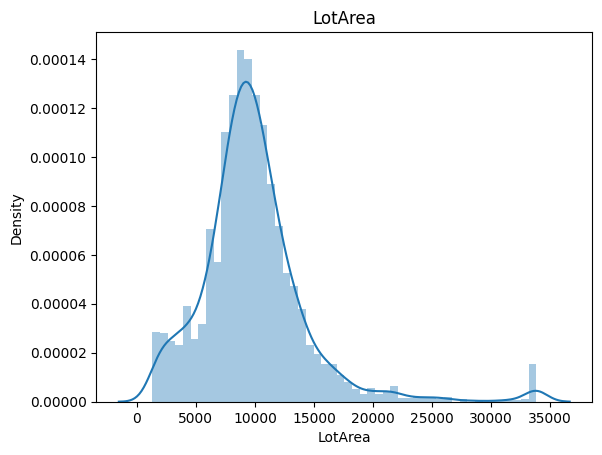

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


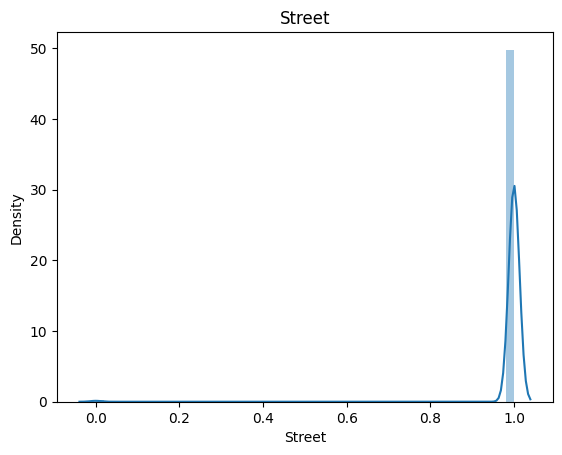

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


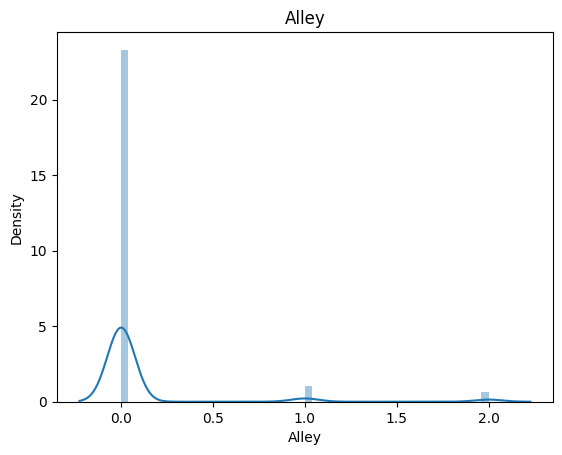

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


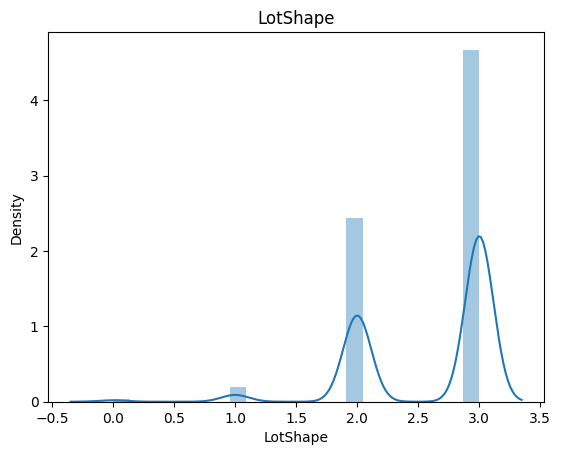

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


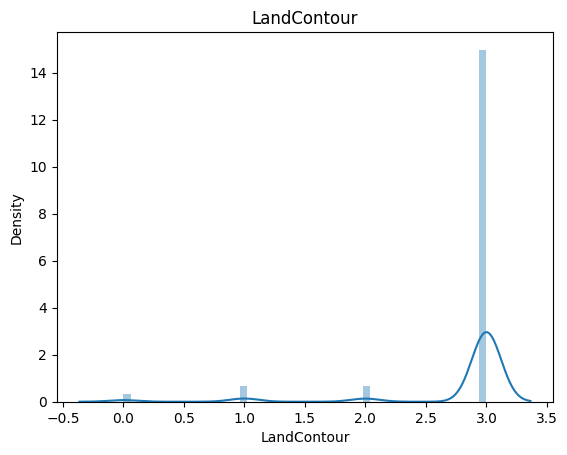

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


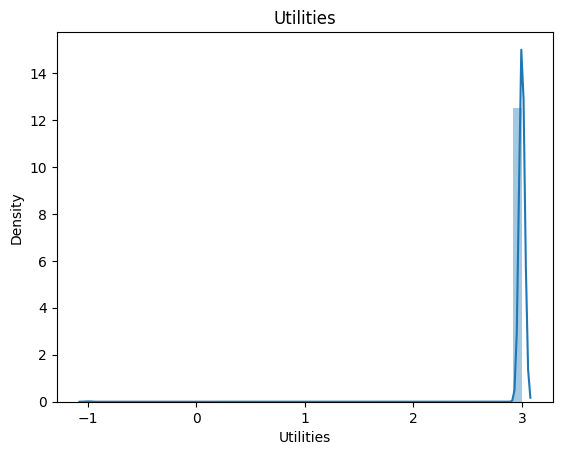

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


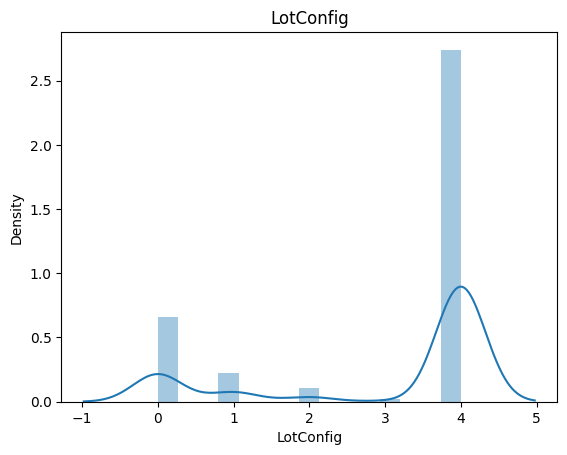

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


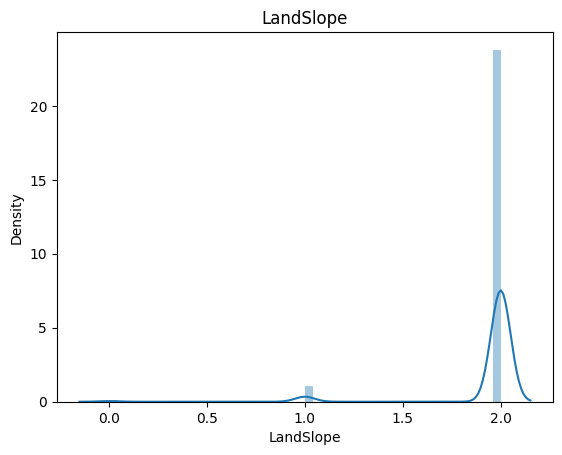

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


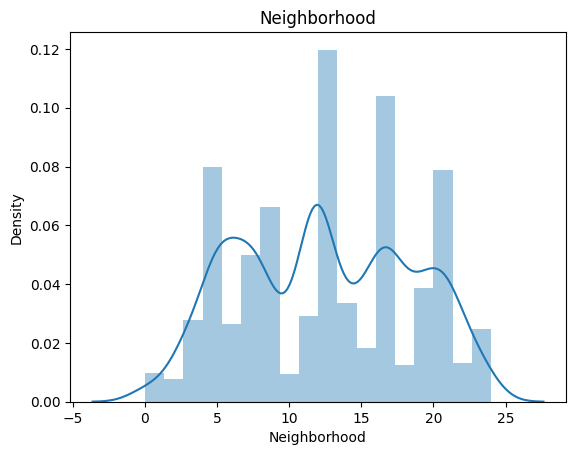

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


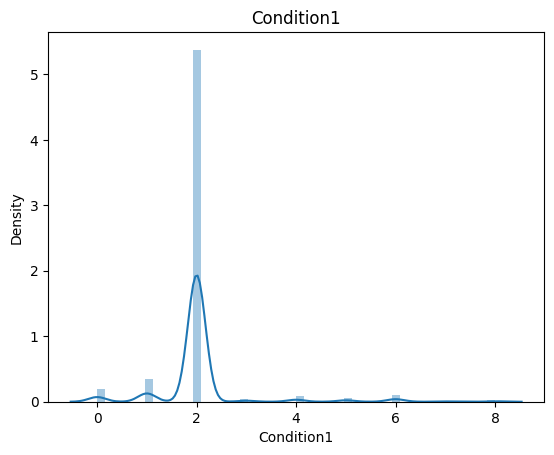

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


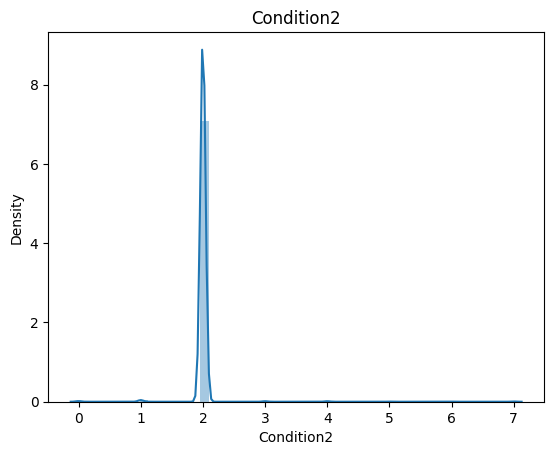

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


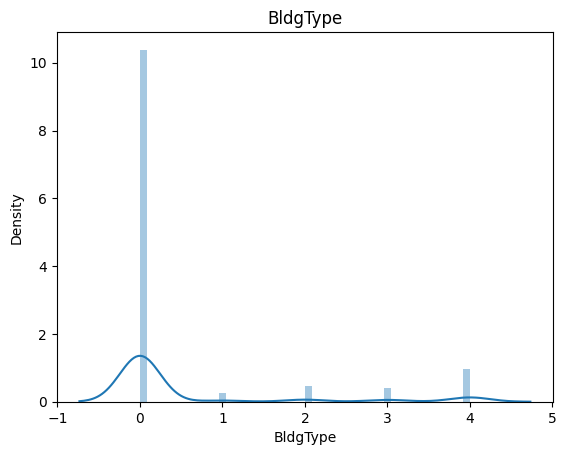

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


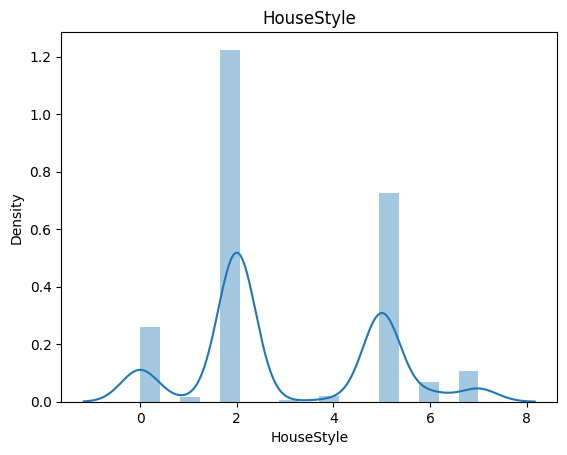

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


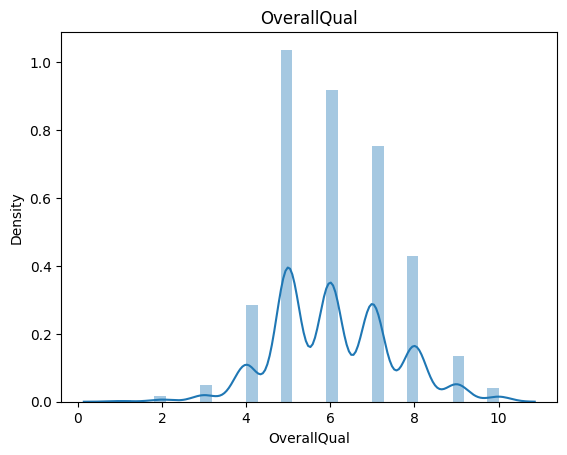

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


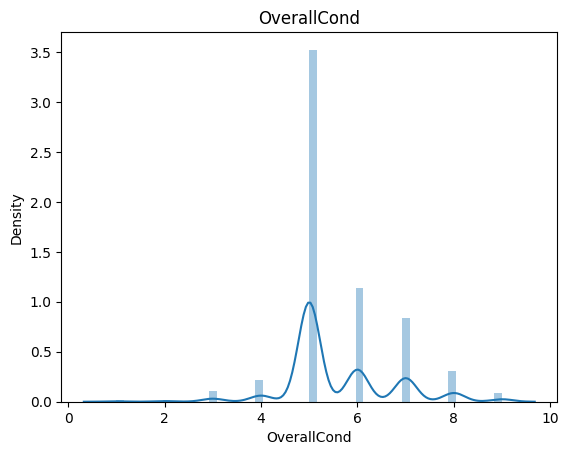

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


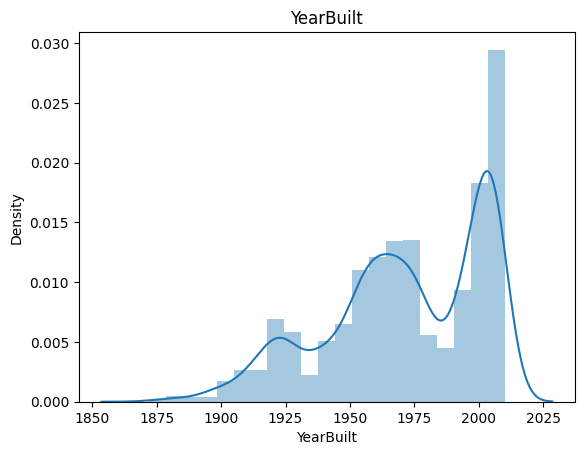

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


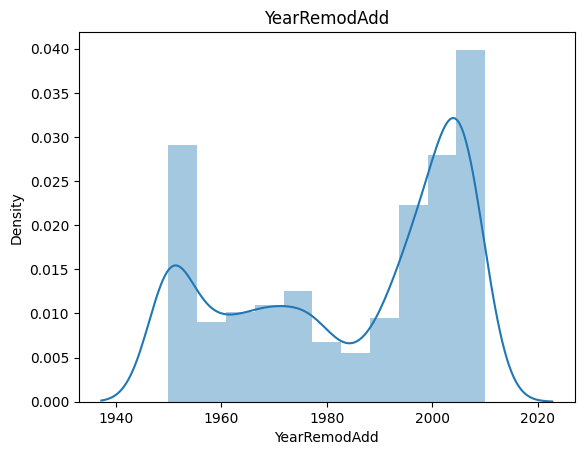

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


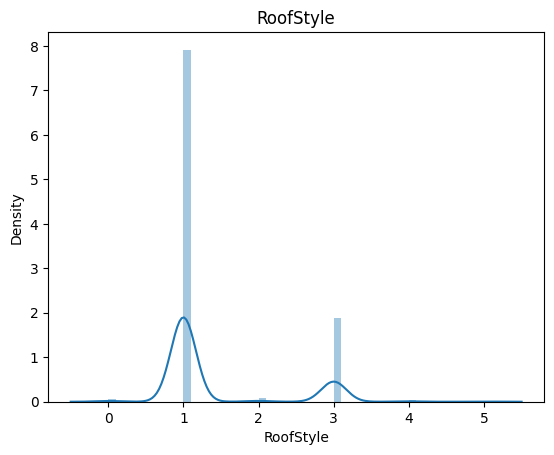

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


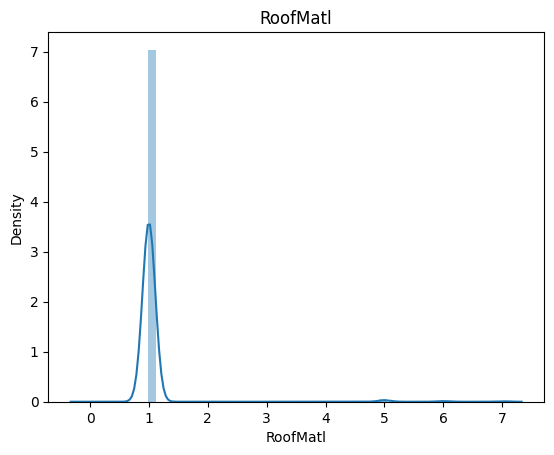

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


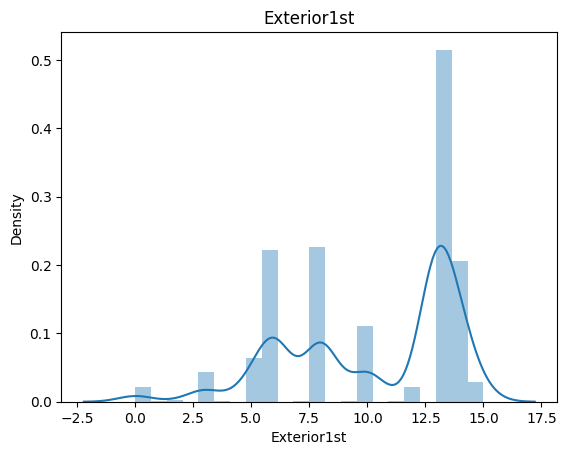

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


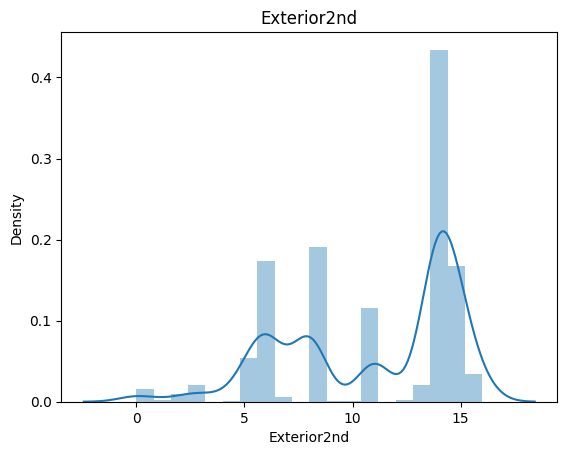

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


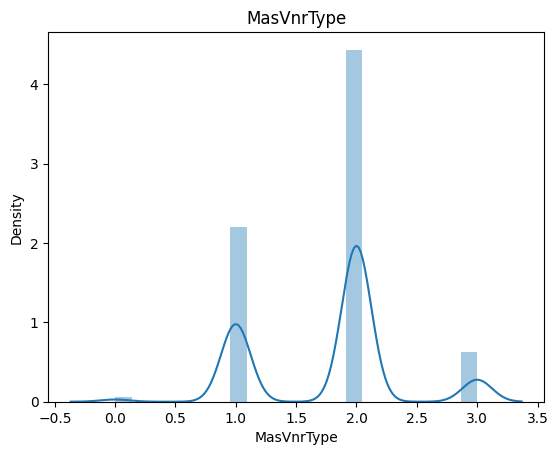

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


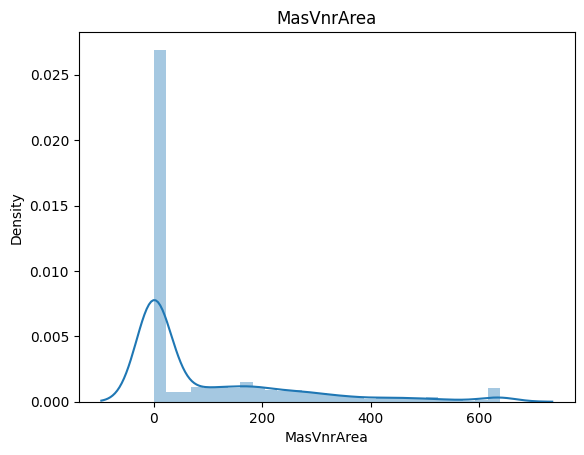

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


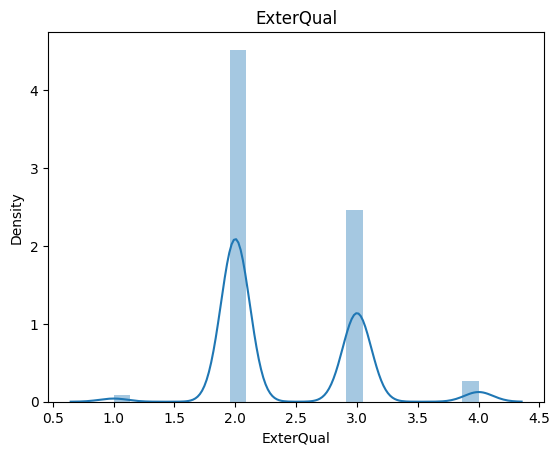

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


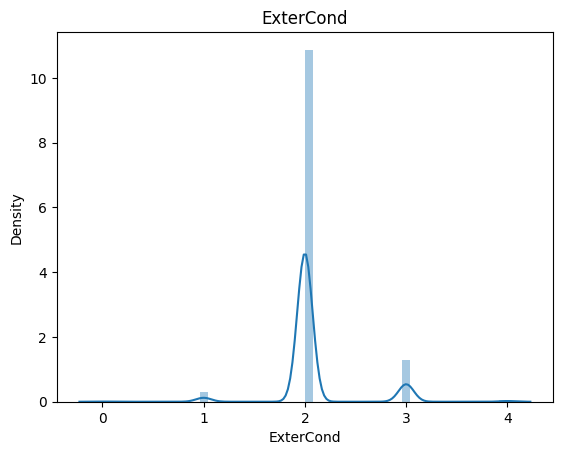

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


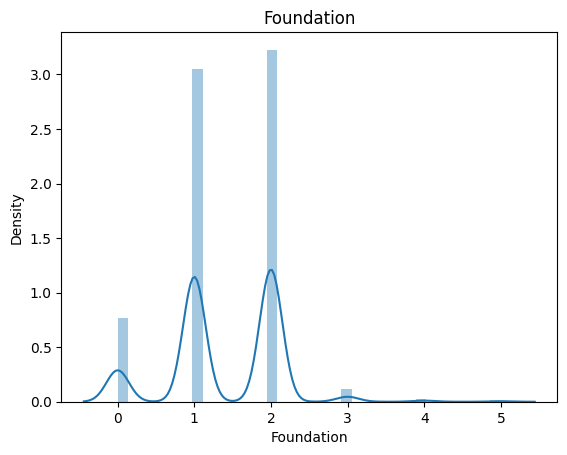

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


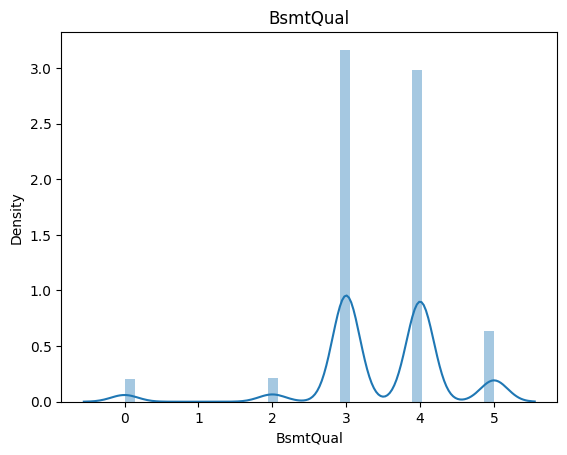

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


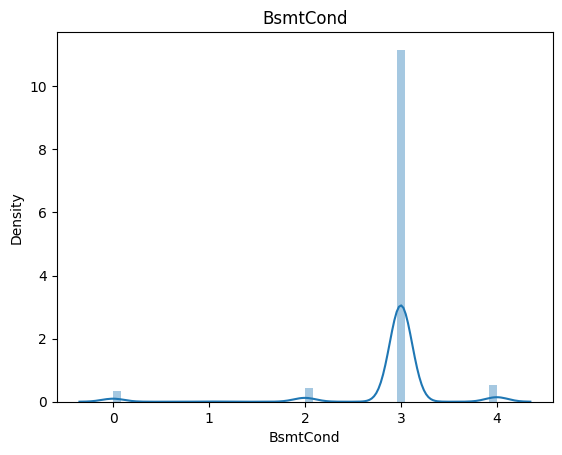

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


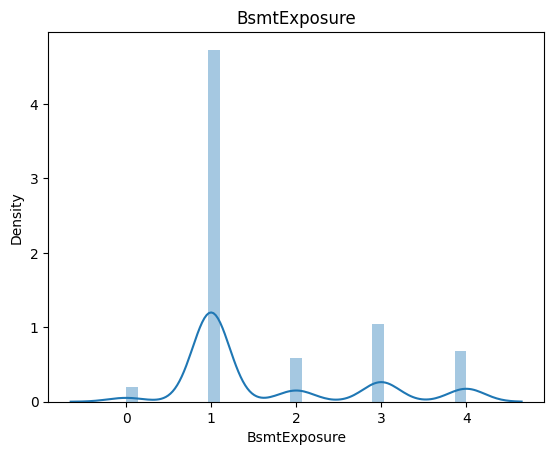

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


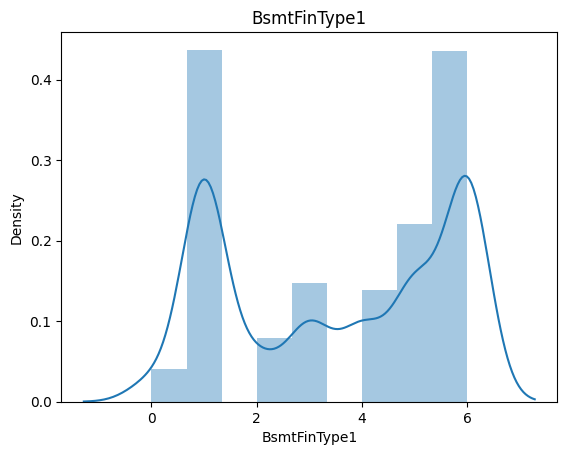

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


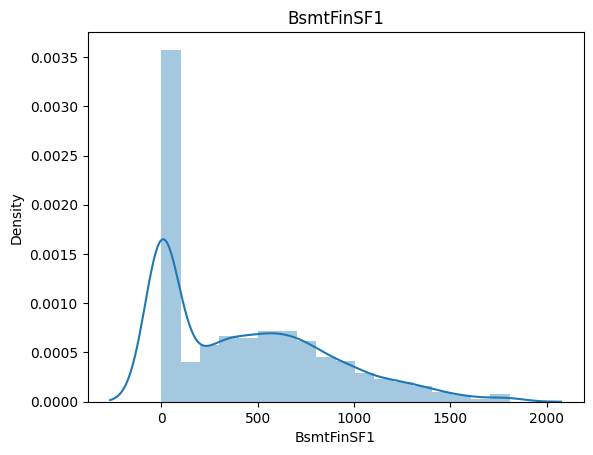

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


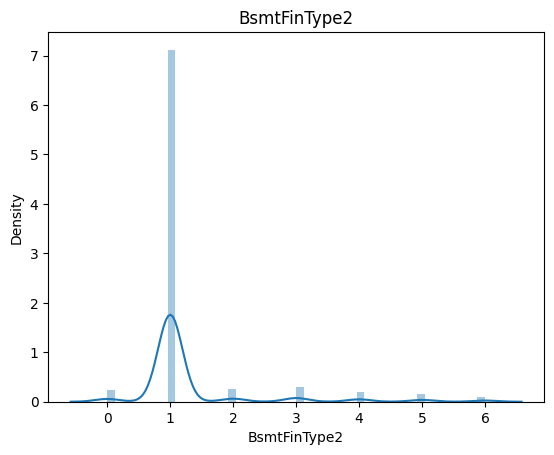

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


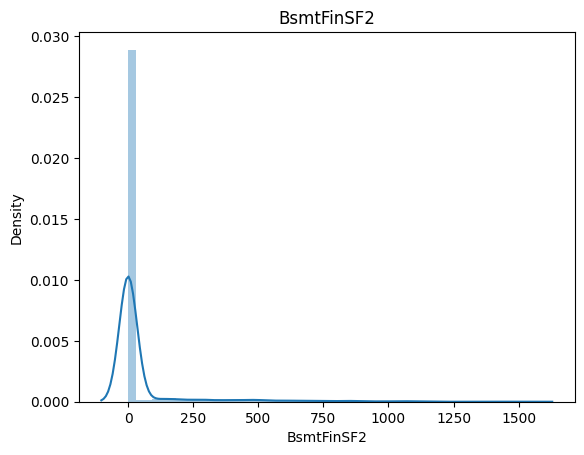

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


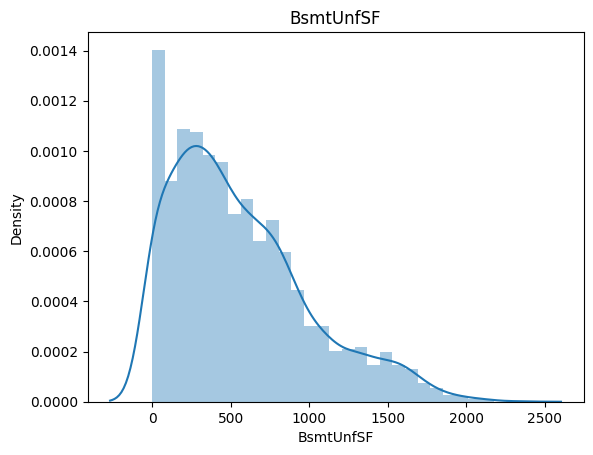

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


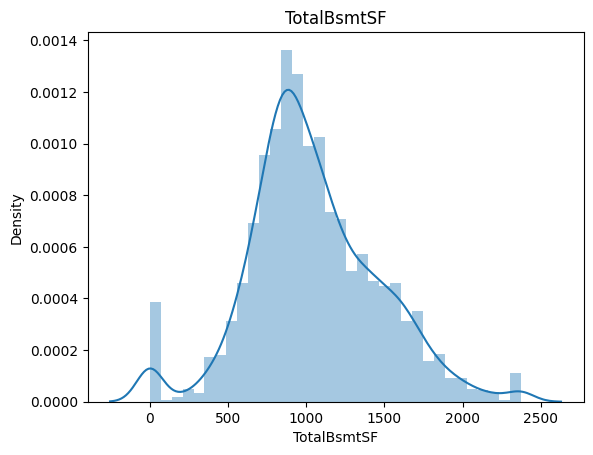

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


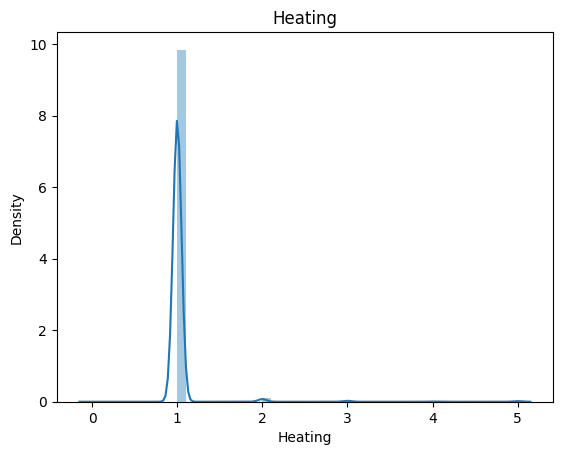

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


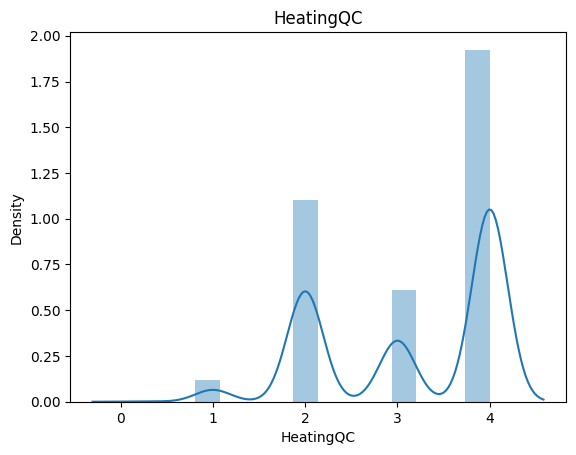

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


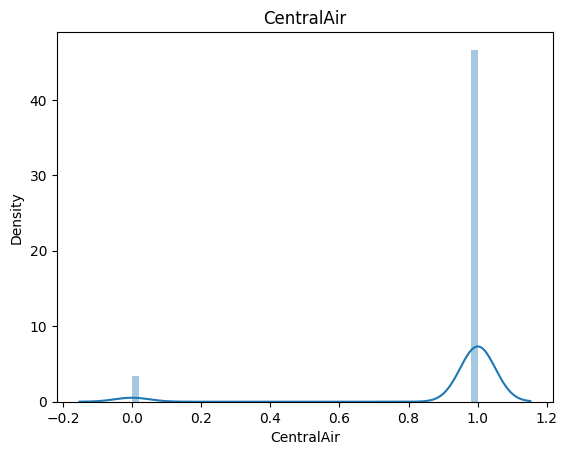

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


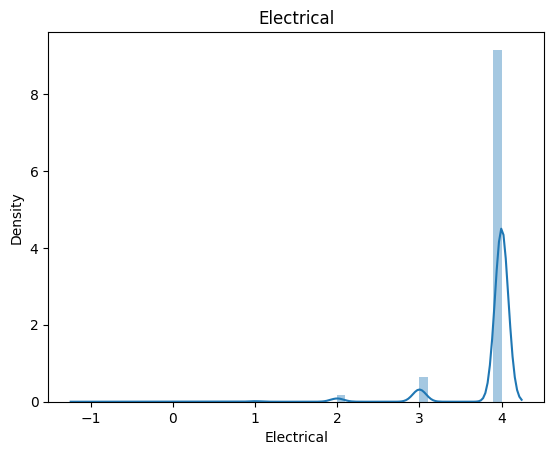

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


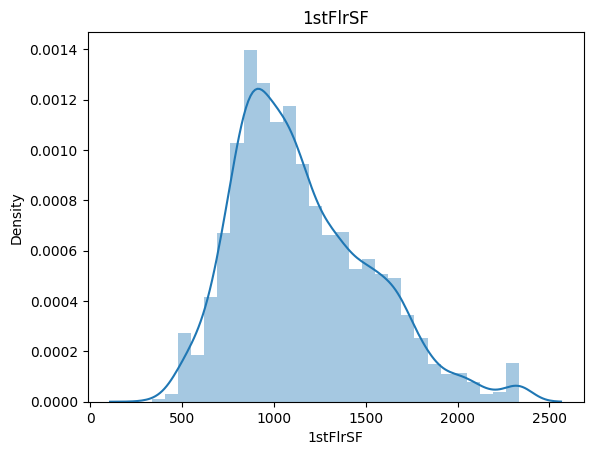

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


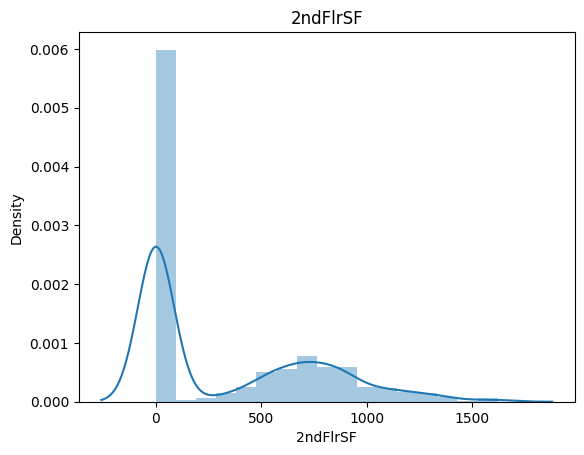

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


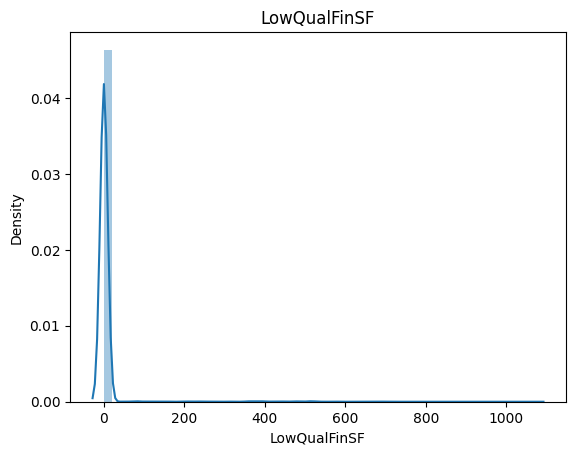

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


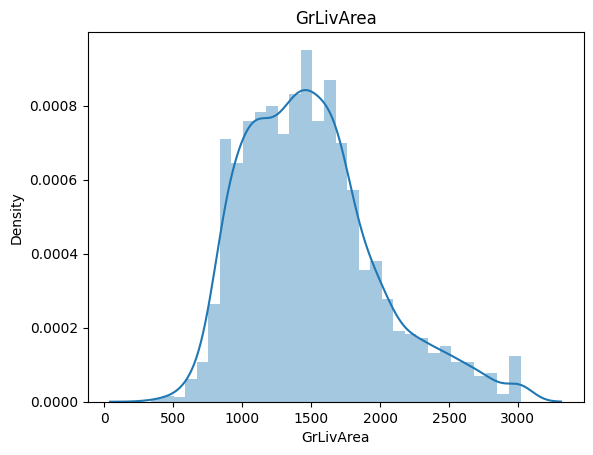

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


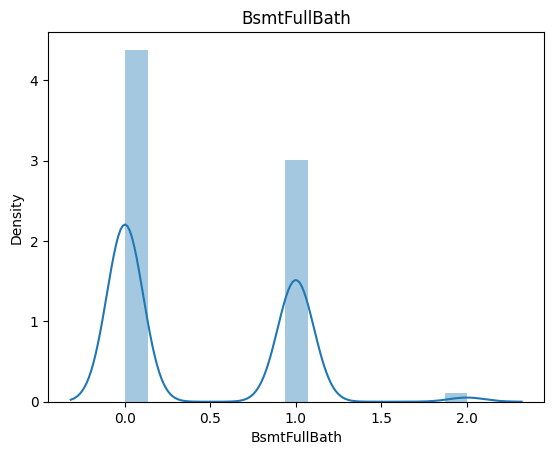

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


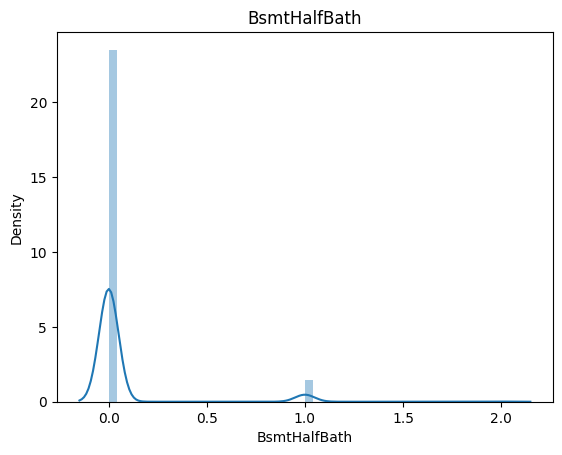

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


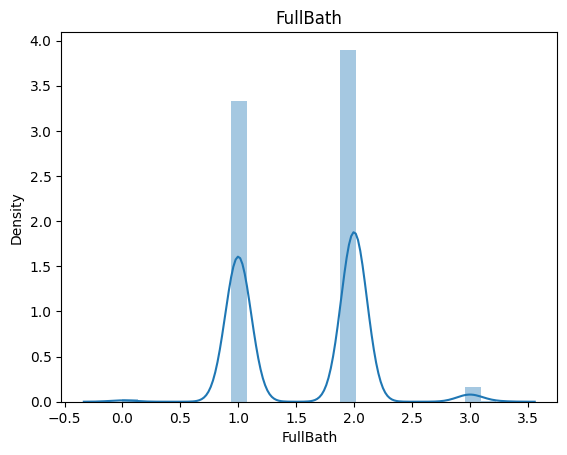

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


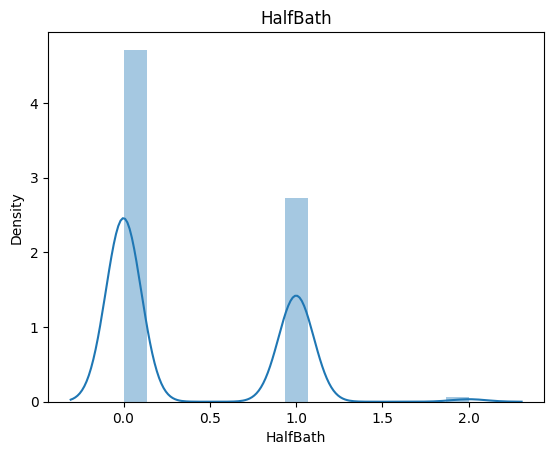

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


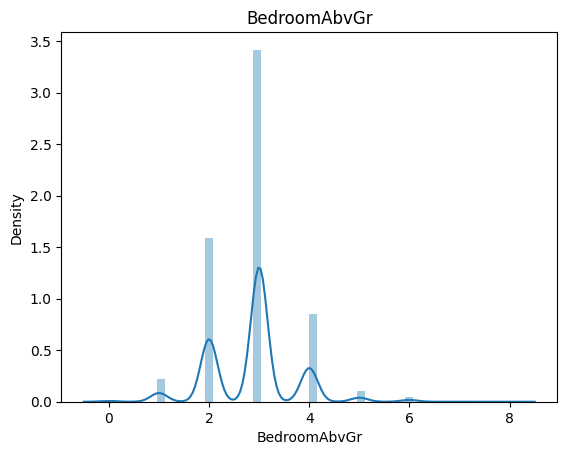

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


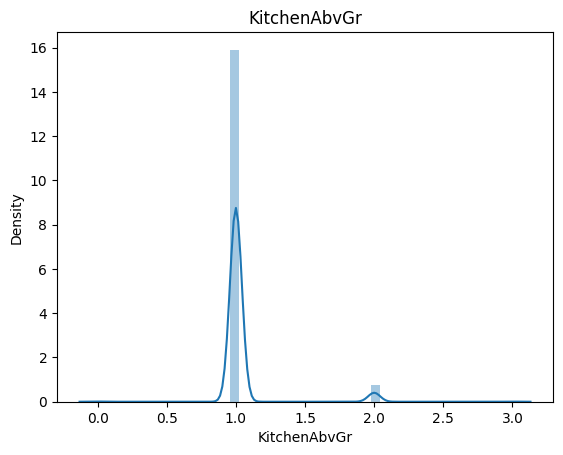

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


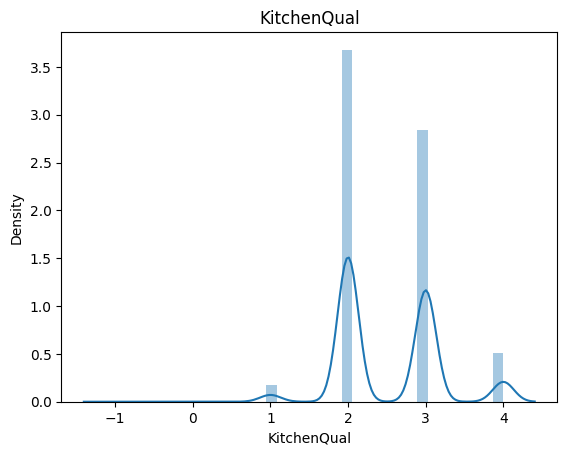

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


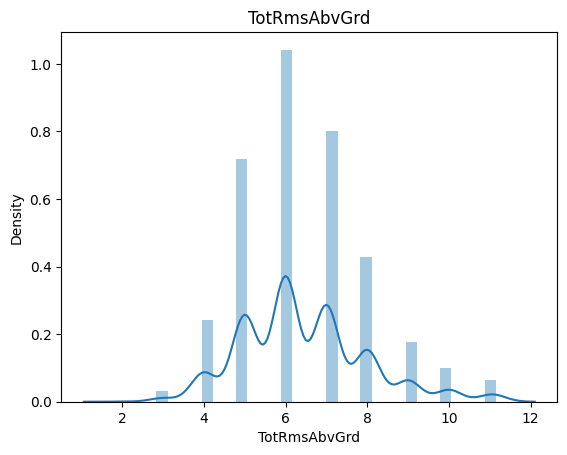

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


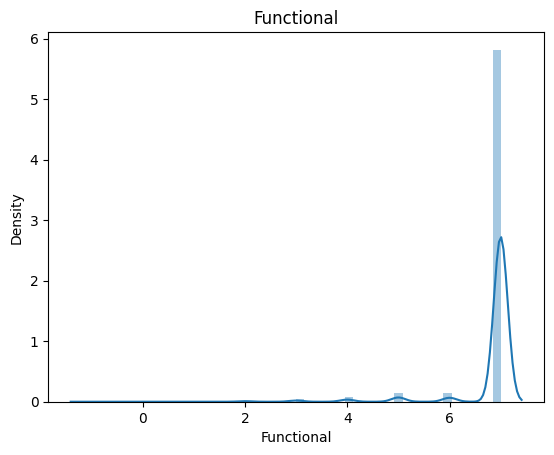

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


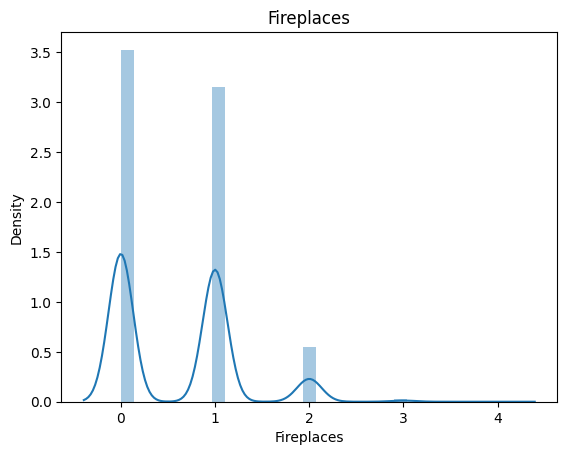

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


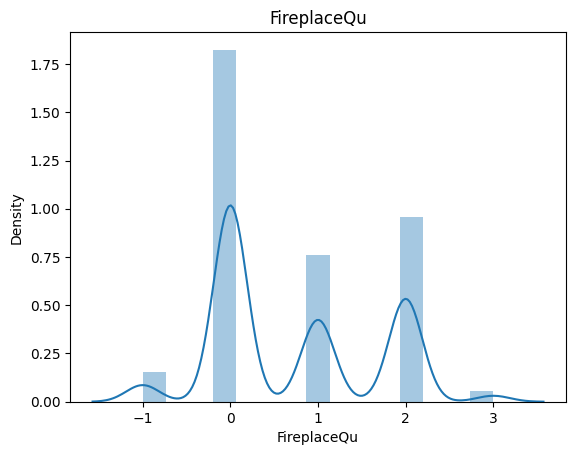

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


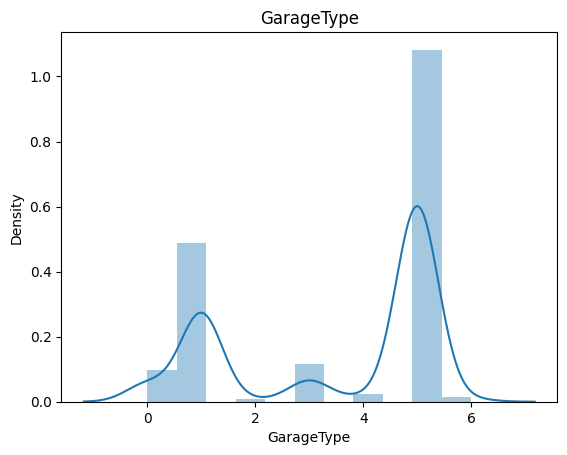

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


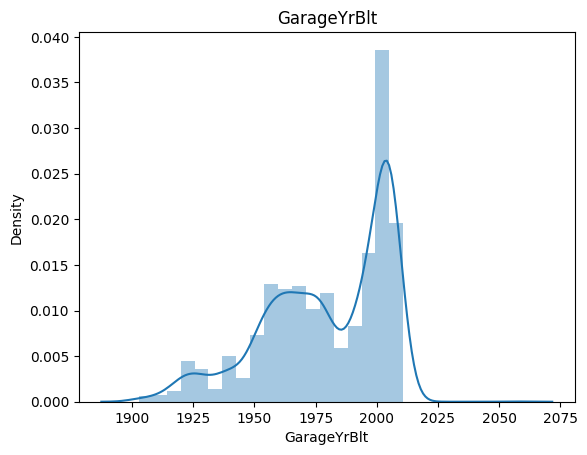

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


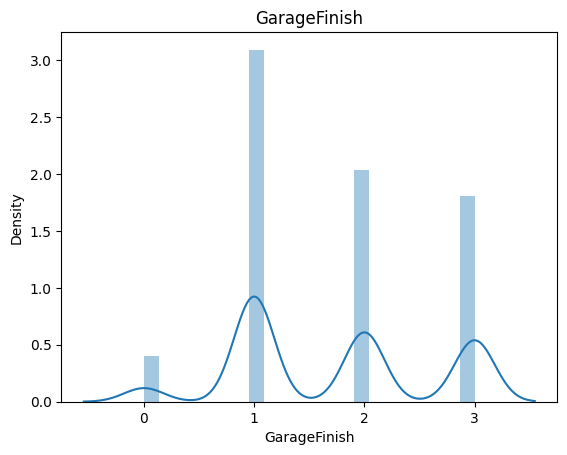

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


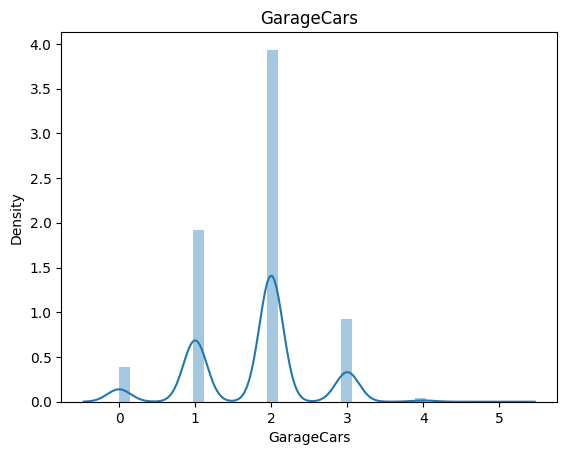

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


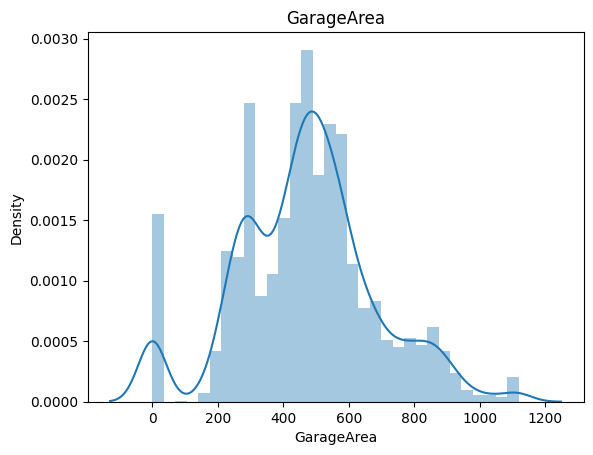

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


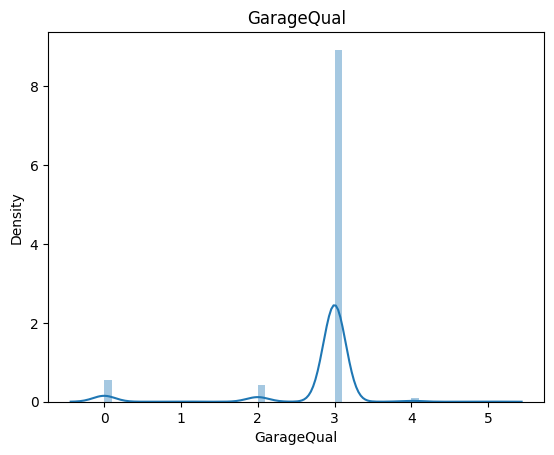

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


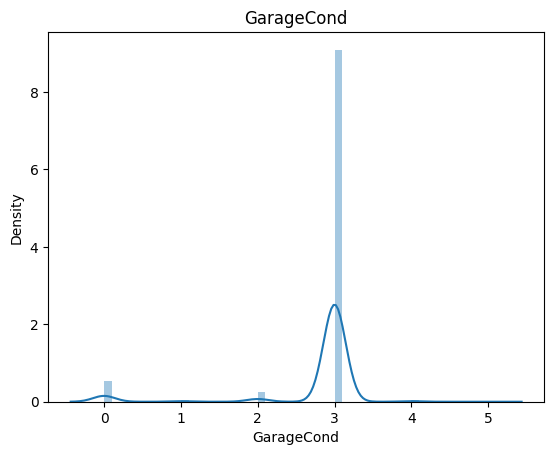

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


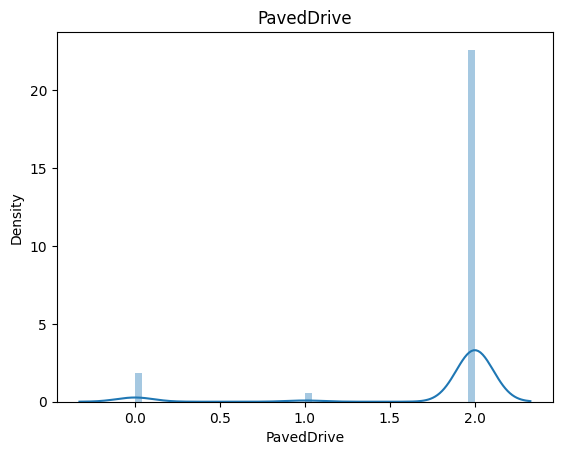

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


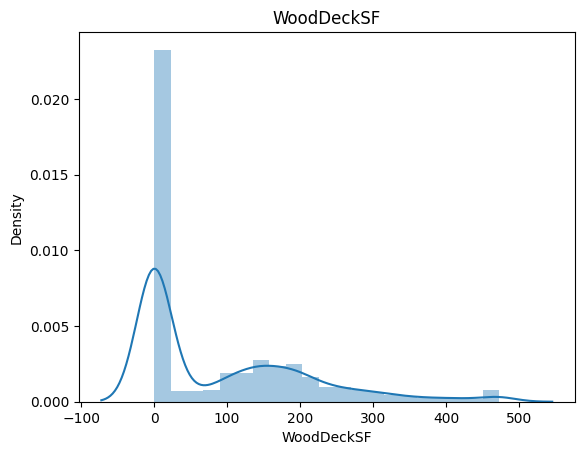

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


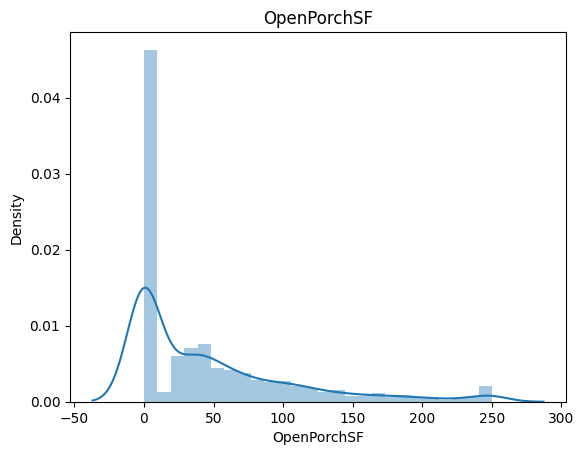

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


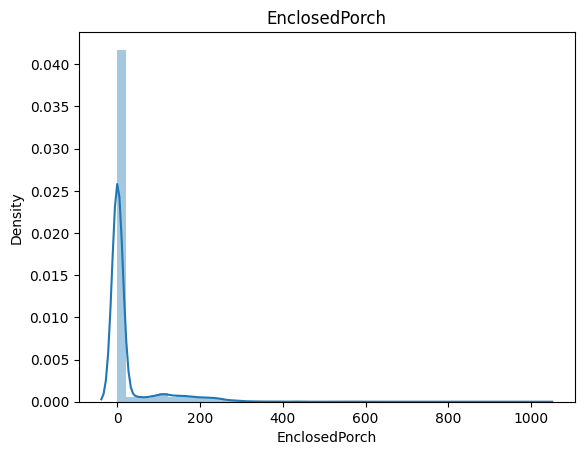

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


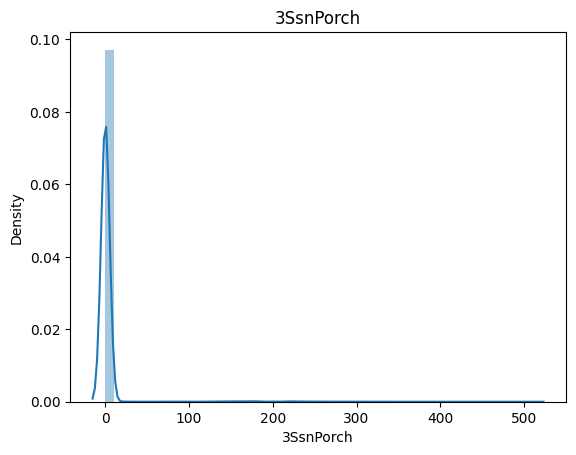

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


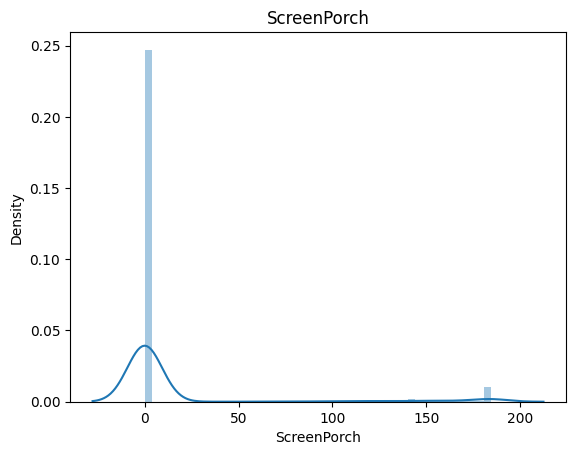

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


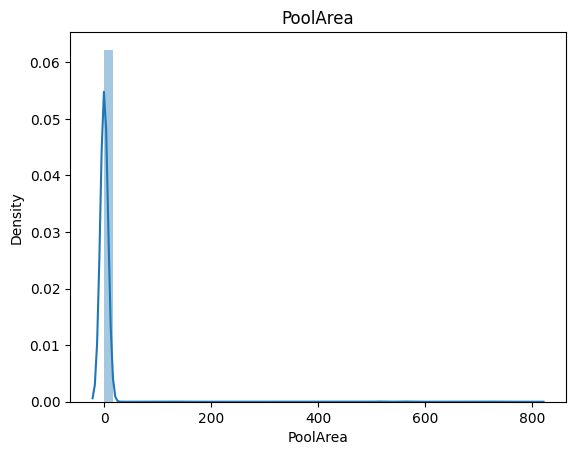

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


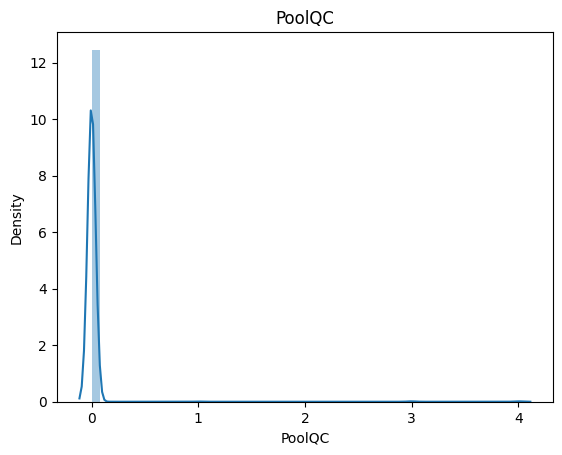

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


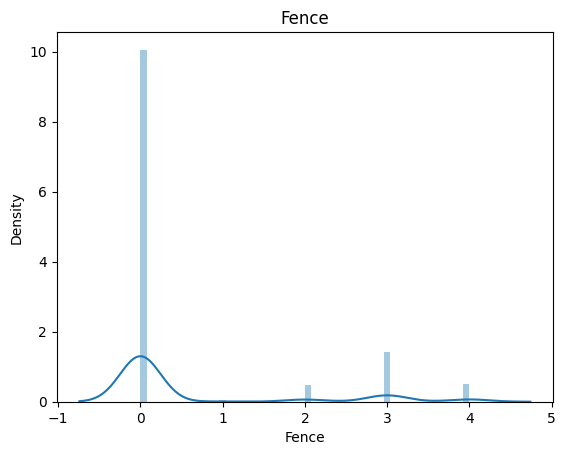

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


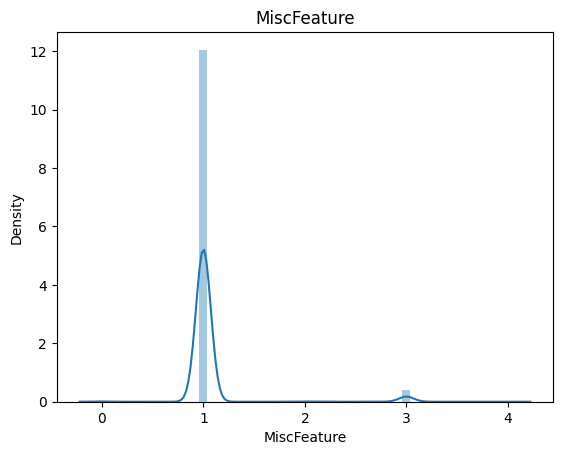

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


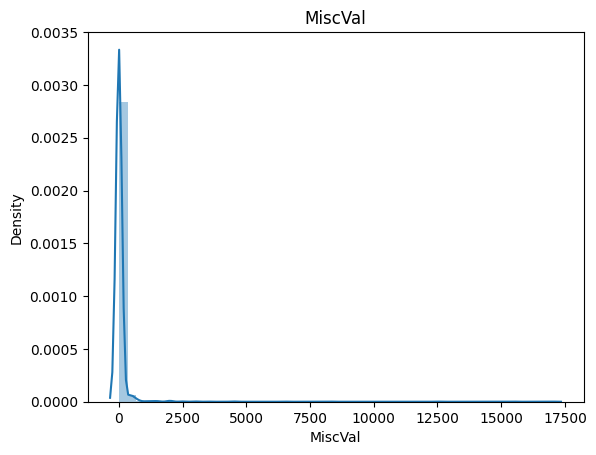

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


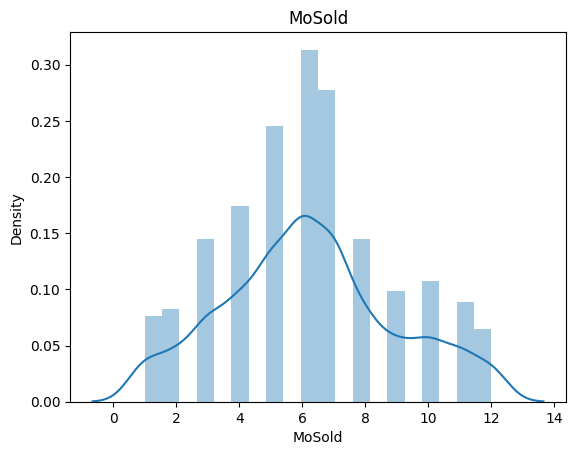

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


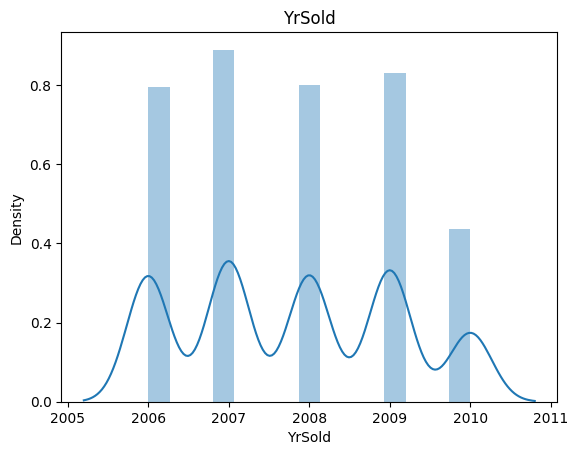

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


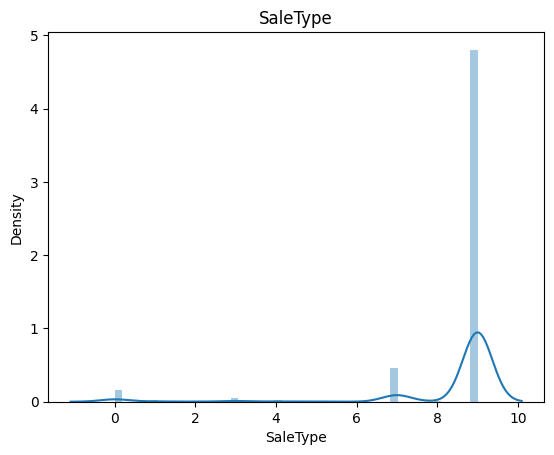

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


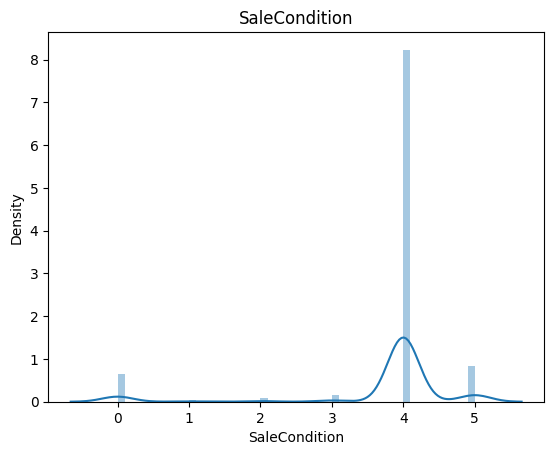

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_82249/1570188552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_features[i])


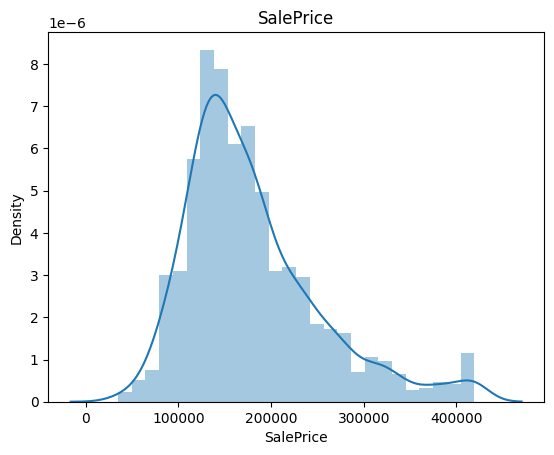

In [71]:
for i in df_all_features:
    sns.distplot(df_all_features[i])
    plt.title(i)  # Add feature name as title
    plt.show()  # Display the plot
    plt.close()  # Close the plot to avoid overlapping figures

In [72]:
scaling_features_v1 = [i for i in df_all_features.columns if df_all_features[i].dtype != 'O' and i not in ['SalePrice']]

In [73]:
scaler = MinMaxScaler()
scaler.fit(df_all_features[scaling_features_v1])
scaled_data_v1 = scaler.transform(df_all_features[scaling_features_v1])
scaled_data_v1

array([[0.00000000e+00, 2.35294118e-01, 8.00000000e-01, ...,
        5.00000000e-01, 1.00000000e+00, 8.00000000e-01],
       [3.42700480e-04, 0.00000000e+00, 8.00000000e-01, ...,
        2.50000000e-01, 1.00000000e+00, 8.00000000e-01],
       [6.85400960e-04, 2.35294118e-01, 8.00000000e-01, ...,
        5.00000000e-01, 1.00000000e+00, 8.00000000e-01],
       ...,
       [9.99314599e-01, 0.00000000e+00, 8.00000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99657300e-01, 3.82352941e-01, 8.00000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 8.00000000e-01],
       [1.00000000e+00, 2.35294118e-01, 8.00000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 8.00000000e-01]])

In [74]:
# Check that the shapes are consistent

print('df_final shape:', df_all_features.shape)
print('df_train shape:', data_train.shape)
print('df_test shape:',  data_test.shape)

X_Train_v1 = pd.DataFrame(df_all_features[:1460])
X_Test_v1  = pd.DataFrame(df_all_features[1460:])
Y_Train_v1 = data_train['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_Train_v1.shape)
print('Y_train shape:', Y_Train_v1.shape)
print('X_test shape:',  X_Test_v1.shape)

df_final shape: (2919, 81)
df_train shape: (1460, 81)
df_test shape: (1459, 80)

Check that the datasets are consistent:

X_train shape (1460, 81)
Y_train shape: (1460,)
X_test shape: (1459, 81)


In [75]:
X_train_v1, X_test_v1, Y_train_v1, Y_test_v1 = train_test_split(X_Train_v1, Y_Train_v1, train_size=0.8, test_size=0.2,random_state=0)

In [76]:
linear_model_v1 = LinearRegression()

In [77]:
linear_model_v1.fit(X_train_v1, Y_train_v1)

LinearRegression()

In [78]:
y_pred_v1 = linear_model_v1.predict(X_test_v1)

In [79]:
mae(y_pred_v1, Y_test_v1)

6309.490113418247

In [80]:
r2_linear_model_v1 = r2_score(Y_test_v1, y_pred_v1)
print(r2_linear_model_v1)

0.9553884698351596


Text(0.5, 1.0, 'Linear Regression Model')

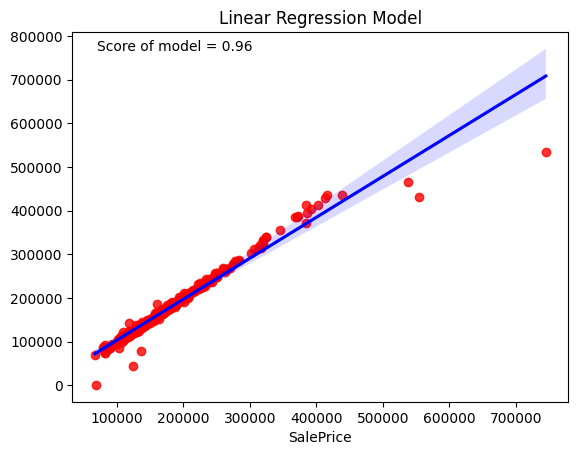

In [81]:
# reg plot of linear model
plt.text(0.05, 0.95, f"Score of model = {r2_linear_model_v1:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test_v1, y=y_pred_v1, color='red', line_kws={'color': 'blue'})
plt.title('Linear Regression Model')

In [82]:
ridge_model_v1 = Ridge(alpha=0.2)

In [83]:
ridge_model_v1.fit(X_train_v1, Y_train_v1)

Ridge(alpha=0.2)

In [84]:
ridge_predict_v1 = ridge_model_v1.predict(X_test_v1)

In [85]:
mae(ridge_predict_v1, Y_test_v1)

6289.705662885011

In [86]:
r2_ridge_model_v1 = r2_score(Y_test_v1, ridge_predict_v1)
print(r2_ridge_model_v1)

0.9556097524080494


Text(0.5, 1.0, 'Linear Regression Model')

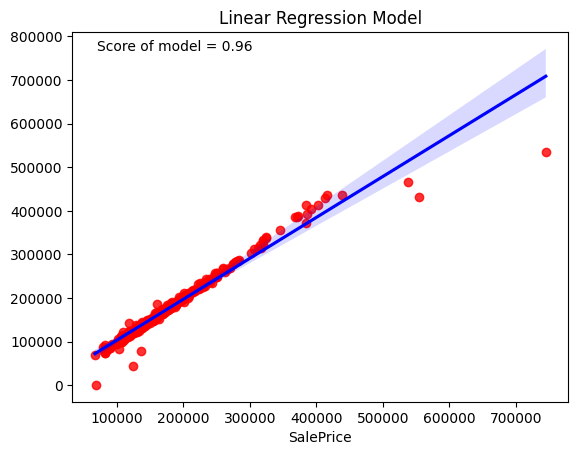

In [87]:
# reg plot of linear model
plt.text(0.05, 0.95, f"Score of model = {r2_ridge_model_v1:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test_v1, y=y_pred_v1, color='red', line_kws={'color': 'blue'})
plt.title('Linear Regression Model')

In [88]:
from sklearn.linear_model import LassoCV

In [89]:
alphas = np.logspace(-3, 3, 100)

In [90]:
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)

In [91]:
lasso_cv.fit(X_train_v1, Y_train_v1)

/Users/nouman.hafeez/Desktop/prediction/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5836195974.128845, tolerance: 579825126.0531945
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nouman.hafeez/Desktop/prediction/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596502814.1515503, tolerance: 579825126.0531945
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nouman.hafeez/Desktop/prediction/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948814912.1601868, tolerance: 579825126.0531945
  model = cd_fast.enet_coordinate_descent_gram(
/

LassoCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5, random_state=0)

In [92]:
alpha_opt = lasso_cv.alpha_

In [93]:
print("Optimal alpha:", alpha_opt)

Optimal alpha: 1000.0


In [94]:
lasso_model_v1 = Lasso(alpha=alpha_opt)

In [95]:
lasso_model_v1.fit(X_train_v1, Y_train_v1)

Lasso(alpha=1000.0)

In [96]:
lasso_predict_v1 = lasso_model_v1.predict(X_test_v1)

In [97]:
mae(lasso_predict_v1, Y_test_v1)

4226.9437357407905

In [98]:
from sklearn.metrics import mean_squared_error as mse
mse(lasso_predict_v1, Y_test_v1)

250280345.19186693

In [99]:
r2_lasso_model_v1 = r2_score(Y_test_v1, lasso_predict_v1)
print(r2_lasso_model_v1)

0.9637582127476788


In [100]:
df_all_features['SalePrice'].describe()

count      1460.000000
mean     179512.256507
std       73240.906241
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      419248.704539
Name: SalePrice, dtype: float64

In [101]:
import tensorflow as tf

2024-04-17 15:11:24.651444: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [102]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [103]:
model_tf = Sequential([
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='linear')
])

In [104]:
X_train_v1_np = np.asarray(X_train_v1)
Y_train_v1_np = np.asarray(Y_train_v1)

In [105]:
model_tf.compile( loss=tf.keras.losses.mean_absolute_error, optimizer=Adam(), metrics=tf.keras.losses.mean_squared_error)

In [106]:
model_tf.fit(X_train_v1_np, Y_train_v1_np, epochs=20)

Epoch 1/20
37/37 [==============================] - 1s 1ms/step - loss: 144569.6094 - mean_squared_error: 26141700096.0000
Epoch 2/20
37/37 [==============================] - 0s 1ms/step - loss: 48013.0977 - mean_squared_error: 4095252224.0000
Epoch 3/20
37/37 [==============================] - 0s 1ms/step - loss: 4929.1890 - mean_squared_error: 224380512.0000
Epoch 4/20
37/37 [==============================] - 0s 1ms/step - loss: 2664.5327 - mean_squared_error: 231296720.0000
Epoch 5/20
37/37 [==============================] - 0s 964us/step - loss: 2246.7180 - mean_squared_error: 228446000.0000
Epoch 6/20
37/37 [==============================] - 0s 974us/step - loss: 1803.9589 - mean_squared_error: 223914560.0000
Epoch 7/20
37/37 [==============================] - 0s 990us/step - loss: 1493.1075 - mean_squared_error: 222009696.0000
Epoch 8/20
37/37 [==============================] - 0s 957us/step - loss: 1428.2769 - mean_squared_error: 221185344.0000
Epoch 9/20
37/37 [================

In [107]:
X_train_v1_np

array([[6.19000e+02, 2.00000e+01, 4.00000e+00, ..., 7.00000e+00,
        5.00000e+00, 3.14813e+05],
       [8.71000e+02, 2.00000e+01, 4.00000e+00, ..., 9.00000e+00,
        4.00000e+00, 1.09500e+05],
       [9.30000e+01, 3.00000e+01, 4.00000e+00, ..., 9.00000e+00,
        4.00000e+00, 1.63500e+05],
       ...,
       [1.21700e+03, 9.00000e+01, 5.00000e+00, ..., 9.00000e+00,
        4.00000e+00, 1.12000e+05],
       [5.60000e+02, 1.20000e+02, 4.00000e+00, ..., 9.00000e+00,
        4.00000e+00, 2.34000e+05],
       [6.85000e+02, 6.00000e+01, 4.00000e+00, ..., 9.00000e+00,
        4.00000e+00, 2.21000e+05]])

In [108]:
tf_predictions = model_tf.predict(X_test_v1)
tf_predictions

10/10 [==============================] - 0s 829us/step


array([[200798.48 ],
       [133023.06 ],
       [109967.9  ],
       [192114.22 ],
       [ 87979.57 ],
       [ 85058.06 ],
       [282969.2  ],
       [141052.92 ],
       [419522.25 ],
       [148786.75 ],
       [208951.11 ],
       [137010.83 ],
       [225022.6  ],
       [123049.92 ],
       [119261.59 ],
       [145053.28 ],
       [190026.05 ],
       [123605.59 ],
       [149377.94 ],
       [155026.4  ],
       [165978.81 ],
       [144479.89 ],
       [110016.08 ],
       [174002.73 ],
       [185042.52 ],
       [168126.97 ],
       [177499.27 ],
       [ 84478.47 ],
       [320027.16 ],
       [118536.51 ],
       [110086.76 ],
       [213013.78 ],
       [155973.69 ],
       [250083.94 ],
       [372536.84 ],
       [175083.92 ],
       [277510.9  ],
       [112505.06 ],
       [263066.34 ],
       [325063.44 ],
       [242885.25 ],
       [129821.56 ],
       [165012.97 ],
       [280083.66 ],
       [403056.56 ],
       [119144.3  ],
       [124995.09 ],
       [12823

In [114]:
Y_test_v1.head()

529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64